## Module 1 Final Project:
# Predicting Housing Prices for the King County Dataset
* **Student Name**: Matthew Onstott
* **Student Pace**: Self-Paced (Online)
* **Instructor Name**: Eli Thomas 
* **Project Review**: TBD 
* **Blog Post URL**: https://monstott.github.io/the_frequentist_and_bayesian_bridge

## Goal:  
To use a multivariate linear regression model to predict house sale prices.

## Problem Approach: 

The process used in the solution of this problem is OSEMN. The stages for this data science framework are Obtain, Scrub, Explore, Model, and Interpret. How these phases are incorporated into the solution is explained below:

1. [OBTAIN and SCRUB: Data Discovery and Preprocessing](#1.-Data-Discovery-and-Preprocessing)
    - Activities: Read the dataset, Check data types, Fix formatting issues, Inspect for placeholders, Handle null values, Remove duplicate rows
2. [EXPLORE: Exploratory Data Analysis](#2.-Exploratory-Data-Analysis)
    - Activities: Handle outliers, Inspect factor-target linear relationships, Review variable normality, Perform factor transformations, Adjust factor scaling, Look at any time dependencies, Investigate any location dependencies
3. [MODEL: Modeling](#3.-Modeling)
    - Activities: Assess multicollinearity, Build a baseline model, Remove features for p-values, Reduce features by t-statistic, Transform the target, Determine train-test split performance
4. [INTERPRET: Interpretation](#4.-Interpretation)
    - Activities: Conclusion, Appendix

## 1. Data Discovery and Preprocessing
### 1.1 Read in the dataset and review basic information on its contents

In [3]:
# necessary libraries
import pandas as pd

# import dataset from CSV file to Pandas dataframe
df = pd.read_csv('kc_house_data.csv')

# print dataset metadata
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


The dataset contains 21,597 rows total. The following columns have missing values:
- **waterfront** 
- **view**
- **yr_renovated**

The dataset contains 21 columns total: 
- 8 columns are of type `float64`
- 11 columns are of type `int64`
- 2 columns are of type `object`

The names of the 2 `object`-type columns are **date** and **sqft_basement**. 
Any column with datetime information should be in an appropriate datetime format. 
Any column providing details on square footage should be in a column of numeric type.
These columns may be in the wrong data type. 

As a next step, let's determine if this is the case.

In [4]:
# necessary libraries
import markdown
from bs4 import BeautifulSoup

# import column name information
column_names = markdown.markdown(open('column_names.md').read())
column_names = ''.join(BeautifulSoup(column_names).findAll(text=True))
column_names.split('\n')

['Column Names and descriptions for Kings County Data Set',
 '',
 'id - unique identified for a house',
 'dateDate - house was sold',
 'pricePrice -  is prediction target',
 'bedroomsNumber -  of Bedrooms/House',
 'bathroomsNumber -  of bathrooms/bedrooms',
 'sqft_livingsquare -  footage of the home',
 'sqft_lotsquare -  footage of the lot',
 'floorsTotal -  floors (levels) in house',
 'waterfront - House which has a view to a waterfront',
 'view - Has been viewed',
 'condition - How good the condition is ( Overall )',
 'grade - overall grade given to the housing unit, based on King County grading system',
 'sqft_above - square footage of house apart from basement',
 'sqft_basement - square footage of the basement',
 'yr_built - Built Year',
 'yr_renovated - Year when house was renovated',
 'zipcode - zip',
 'lat - Latitude coordinate',
 'long - Longitude coordinate',
 'sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors',
 'sqft_lot15 - The

The column name descriptions inform us that the **date** column is the date a house was sold and the **sqft_basement** column is the square footage of a house's basement. This aligns with our initial thoughts.

Let's continue to investigate whether these columns contain correct values.

In [5]:
# preview the dataset
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


The **date** column appears to be in a datetime format.
The **sqft_basement** column appears to contain numeric values.

In order to be as thorough as possible, let's focus our investigation on the entire **date** column to see if there are any formatting issues.

### 1.2 Investigate the *date* column data type

In [6]:
# date column details
print('Number of unique date column values:', len(df.date.unique()))
print('\n')
print('Sample values:')
df.date.unique()[:10]

Number of unique date column values: 372


Sample values:


array(['10/13/2014', '12/9/2014', '2/25/2015', '2/18/2015', '5/12/2014',
       '6/27/2014', '1/15/2015', '4/15/2015', '3/12/2015', '4/3/2015'],
      dtype=object)

There are 372 unique date column values thatappear to be of a `MM/DD/YYYY` format.  Let's determine if that is the case for all values.

In [7]:
# determine how many date column values do not contain '/'
num_date_format = []
for i in range(len(df.date.unique())):    
    if '/' not in df.date.unique()[i]:        
        num_date_format.append(df.date.unique()[i])
    
print('Number of incorrectly formatted date column values:', len(num_date_format))

Number of incorrectly formatted date column values: 0


All column values are in the same format. As a final step in our investigation of the **date** column, let's cast it to a `datetime` object.

In [8]:
# convert date column to datetime object
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(8), int64(11), object(1)
memory 

Let's now turn our attention to the remaining `object`-type column, **sqft_basement**, to determine why it is read as an `object` type.
### 1.3 Investigate the *sqft_basement* column data type

In [9]:
# value counts for sqft_basement
print('Top value counts:')
df.sqft_basement.value_counts()[:10]

Top value counts:


0.0       12826
?           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
300.0       142
900.0       142
Name: sqft_basement, dtype: int64

The reason the data type of **sqft_basement**  is incorrect is because there are rows with non-numeric values, such as *?*.

Let's see if there are any other incorrect values to be aware of.

In [10]:
# determine the sqft_basement values that are not numeric
sqftbsmnt_wrong_format = []
for i in range(len(df.sqft_basement.unique())):
    if '.' not in df.sqft_basement.unique()[i]:
        sqftbsmnt_wrong_format.append(df.sqft_basement.unique()[i])
    
sqftbsmnt_wrong_format

['?']

The *?* value is the only non-numeric column choice. 

From the other square footage columns available, let's see if we can find a way to fill in these missing *?* values.

In [11]:
# feature engineering for missing sqft_basement values
sqft_basement_eqn = df.sqft_living - df.sqft_above
sqft_basement_eqn = sqft_basement_eqn.map('{:.1f}'.format).astype(str)

# determine if engineered equation equals sqft_basement column
basement_equate = sqft_basement_eqn == df.sqft_basement
print('Matches for sqft_basement column and built equation:')
basement_equate.value_counts()

Matches for sqft_basement column and built equation:


True     21143
False      454
dtype: int64

Values for **sqft_basement** calculated from the columns **sqft_living** (the square footage of the home) and **sqft_above** (square footage apart from the basement) are compared with the actual column values. These two series match entirely, except for 454 rows. From work above, we know that 454 column rows have a value of *?*. 

As a final step in our investigation of **sqft_basement**, let's replace its values with the results from our numeric feature engineering equation.

In [12]:
# replace object sqft_basement column with numeric sqft_basement calculation
df.sqft_basement = sqft_basement_eqn.astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(9), int64(11)
memory usage: 3.5

Now that the obvious column data type issues have been taken care of, the next task is to remove the missing values from the dataset.
### 1.4 Investigate missing values

In [13]:
# columns with missing values
df.isna().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront        True
view              True
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated      True
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

There are three columns in the dataset with missing values: **waterfront**, **view**, and **yr_renovated**. Missing data presents many challenges: it reduces statistical power (the probability that a statistical test will reject the null hypothesis when it is false); it leads to bias in parameter estimates; it reduces the accuracy of sample representations; and, it complicates both the analysis and resulting conclusions.

Next, let's find out the extent of missing values in the dataset.

In [14]:
# number of rows with missing values
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

There are 2,376 missing rows in **waterfront**, 63 in **view**, and 3,842 in **yr_renovated**.

### 1.5 Handle missing values in the *waterfront* column

In [15]:
# unique values in the waterfront column
df.waterfront.unique()

array([nan,  0.,  1.])

There are 3 unique values in the **waterfront** column: *nan, 0, and 1*. Let's now determine what percentage of this column is missing.

In [16]:
# percentage of the waterfront column that is missing
len(df[df.waterfront.isna()]) / len(df)

0.11001527989998611

11.0% of the **waterfront** column has missing values. This is above the 5% threshold used as a [rule of thumb](http://www.hubresearch.ca/bridging-the-data-gap-how-to-deal-with-missing-data-in-observational-studies/) by many data scientists when determining when it is appropriate to drop missing values from the dataset. Therefore, instead of deleting these rows, we should apply a different method: imputation. The goal of imputation is to preserve as much of the raw information as possible by giving values to the missing rows in a manner that least disturbs the column distribution and its relationship with other columns.

Therefore, let's look into the column distribution to get an idea of value relationships.

In [17]:
# value counts for the waterfront column
print(df.waterfront.value_counts())
print(df.waterfront.value_counts(normalize=True))

0.0    19075
1.0      146
Name: waterfront, dtype: int64
0.0    0.992404
1.0    0.007596
Name: waterfront, dtype: float64


99.2% of the column has a value of *0* and only 0.8% has a value of *1*. Ideally, after we impute missing values, the distribution of column values will be nearly identical to this. 

As an exercise, let's see how much the column distribution would be affected by giving missing rows their own value.

In [18]:
# import necessary libraries
import numpy as np

# replace missing rows with value of 'missing'
df.waterfront.replace(np.nan, 'missing', inplace=True)
print(df.waterfront.value_counts())
print(df.waterfront.value_counts(normalize=True))

0.0        19075
missing     2376
1.0          146
Name: waterfront, dtype: int64
0.0        0.883225
missing    0.110015
1.0        0.006760
Name: waterfront, dtype: float64


If we give the 2,376 missing rows in **waterfront** their own value they would make up 11.0% of the column. In the context of our business problem, however, this is misleading. A house is either on the waterfront or it is not. There is no in between. There is no real world value in not knowing a house's waterfront status for a model built to determine its sales price. In such a scenario, work would need to be put in to determine whether a house is on the waterfront or not.

As a final step to our investigation of the **waterfront** column, let's impute the missing values by randomly assigning values of *0 and 1* using the probabilities set by the column distribution.

In [19]:
# impute missing waterfront column values

# column distribution
rel_prob = [0.992404, 0.007596]
prob = [i / sum(rel_prob) for i in rel_prob]

# impute function
def impute_wf(value):
    
    if value == 'missing':        
        return np.random.choice([0.0, 1.0], p=prob)
    
    else:        
        return value
    
# apply impute function to column
df.waterfront = df.waterfront.map(lambda x: impute_wf(x))
df.waterfront = np.int64(df.waterfront)
print(df.waterfront.value_counts())
print(df.waterfront.value_counts(normalize=True))

0    21436
1      161
Name: waterfront, dtype: int64
0    0.992545
1    0.007455
Name: waterfront, dtype: float64


The distribution of values in the **waterfront** column after applying our impute function on the missing rows is nearly identical to the distribution prior to this activity. Our goal to minimize effects on the dataset appears successful. Let's now look at the missing values of the **yr_renovated** column.
### 1.6 Handle missing values of the *yr_renovated* column

In [20]:
# number of missing values
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

The **yr_renovated** column has 3,842 missing values. How many other values are there? Let's find out.

In [21]:
# value details for the yr_renovated column
print('Number of unique yr_renovated values:', len(df.yr_renovated.unique()))
df.yr_renovated.unique()

Number of unique yr_renovated values: 71


array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

There are 71 unique values in the **yr_renovated** column. As a next step, let's determine what percentage of values are missing.

In [22]:
# percentage of missing values in the yr_renovated column
len(df[df.yr_renovated.isna()]) / len(df)

0.17789507802009538

Missing values represent 17.8% of the column. This is higher than the 5% cutoff for row deletion that is used as a general rule. Our goal now is to determine what imputation method would be the most appropriate to apply.

In [23]:
# value counts for the yr_renovated column
print('Top value counts:')
df.yr_renovated.value_counts()[df.yr_renovated.value_counts() > 12]

Top value counts:


0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
2000.0       29
2005.0       29
1990.0       22
2004.0       22
2009.0       21
1989.0       20
2006.0       20
2002.0       17
1991.0       16
1998.0       16
1984.0       16
1999.0       15
2008.0       15
2010.0       15
2001.0       15
1983.0       15
2015.0       14
1985.0       14
1986.0       14
1987.0       14
1994.0       14
1992.0       13
Name: yr_renovated, dtype: int64

The majority of homes (17,011) are not renovated and have a **yr_renovated** value of *0.0*. It may make sense to binarize this column. Let's look at the percentages of houses renovated and not.

In [24]:
# percentage of houses renovated and not renovated
ren_yes = len(df.yr_renovated) - df.yr_renovated.value_counts()[0] - df.yr_renovated.isna().sum()
print('Number of houses renovated:', ren_yes)
print('Percentage of houses renovated:', ren_yes / len(df.yr_renovated))
print('Percentage of houses NOT renovated:', df.yr_renovated.value_counts()[0] / len(df.yr_renovated))

Number of houses renovated: 744
Percentage of houses renovated: 0.03444922905959161
Percentage of houses NOT renovated: 0.787655692920313


78.8% of houses have not been renovated. Only 3% of houses have been renovated. Given the disparity in the distribution between these values, it makes sense to create a new column that informs us if a house has been renovated or not instead of what year it may have been renovated. This will reduce the dimensionality of the problem and increase the predictability power of our regression models. Instead of using few data points for each renovation year to train the model, we will have a larger set representing the renovation status to draw from.

Let's create a new column to inform us whether a house has been renovated or not.

In [25]:
# binarize the yr_renovated column into an 'if renovated' column
df['if_renovated'] = df.yr_renovated.map(lambda x: 1 if x > 0 else 0)
print(df.if_renovated.value_counts())
print(df.if_renovated.value_counts(normalize=True))

0    20853
1      744
Name: if_renovated, dtype: int64
0    0.965551
1    0.034449
Name: if_renovated, dtype: float64


Now that the **yr_renovated** column has been binarized into the **if_renovated** column we find that 96.6% of homes have not been renovated and that 3.4% have been renovated. This does not account for missing values. Since there are no other answers to the question of a house's renovation other than yes or no, it does not make sense to provide missing rows with a separate value. Therefore, we should impute missing values using the same strategy employed on **waterfront**: random assignments based on the distribution.

In [26]:
# replace missing values with 'missing'
df.if_renovated.replace(np.nan, 'missing', inplace=True)

# remove the yr_renovated column 
df.drop('yr_renovated', axis=1, inplace=True)

# column distribution
rel_prob = [0.965551, 0.034449]
prob = [i / sum(rel_prob) for i in rel_prob]

# impute function
def impute_ir(value):
    
    if value == 'missing':
        return np.random.choice([0,1], p=prob)
    
    else:
        return value

# apply impute function to the column
df.if_renovated = df.if_renovated.map(lambda x: impute_ir(x))
print(df.if_renovated.value_counts())
print(df.if_renovated.value_counts(normalize=True))

0    20853
1      744
Name: if_renovated, dtype: int64
0    0.965551
1    0.034449
Name: if_renovated, dtype: float64


Randomly imputing missing rows with values based on the column distribution results in value counts for **if_renovated** nearly identical to what was found above. The task of handling missing values for **yr_renovated** through feature engineering and imputation is a success. The final column with missing values to take a look at is **view**. 

### 1.7 Handle missing values of the *view* column

In [27]:
# column null values
df.isna().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view             63
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
if_renovated      0
dtype: int64

The **view** column has 63 missing values. What are the unique values for this column? 

In [28]:
# unique values in view column
print(df.view.unique())
df.view.value_counts()

[ 0. nan  3.  4.  2.  1.]


0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

There are 6 unique values in the **view** column. They appear similar enough in size that binarizing this information does not appear necessary. What percentage of the column is missing?

In [29]:
# percentage of view column missing
len(df[df.view.isna()]) / len(df)

0.0029170718155299346

0.3% of the **view** column is missing. This is a small percentage. Since it is below the rule of thumb figure of 5% the recommended action is to delete the rows with missing values.

In [30]:
# drop missing rows
df = df.dropna()
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
if_renovated     0
dtype: int64

Missing values are no longer an issue. Next, let's assess whether duplicates are a problem within the data. Duplicate data can improperly weight values and lead to skewed parameter estimates and inaccurate conclusions.

### 1.7 Investigate duplicate rows

In [31]:
# number of duplicate rows
len(df[df.duplicated()])

0

There are no duplicate records in the dataset. We can now move on to exploring the data.

## 2. Exploratory Data Analysis

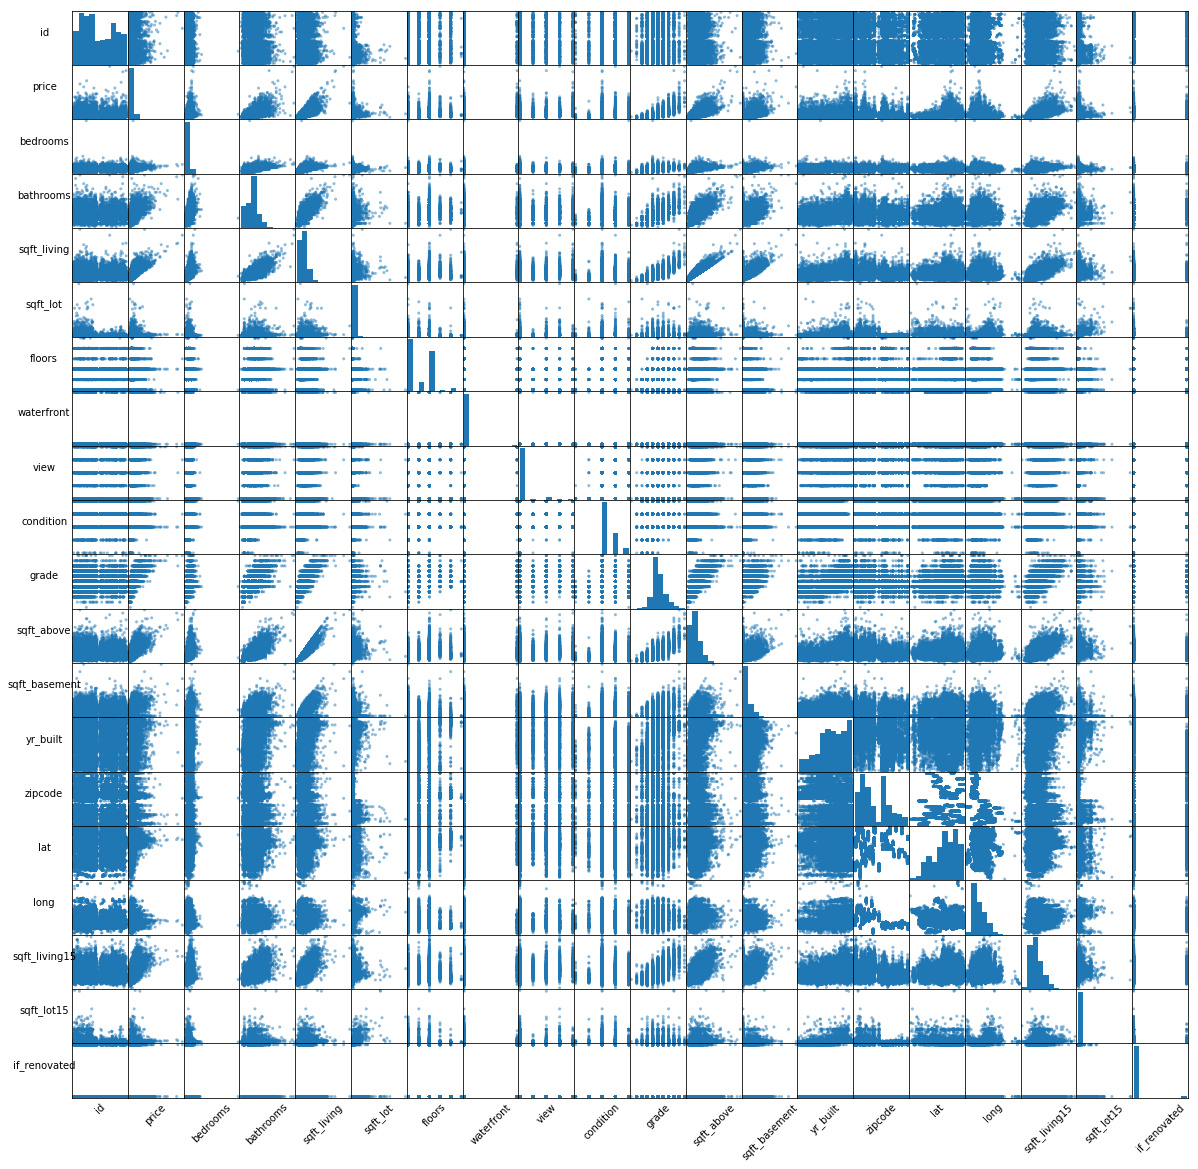

In [32]:
# import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# scatter plots for entire df 
scatter_matrix = pd.plotting.scatter_matrix(df, figsize=[20, 20])

## rotate x-axis labels
[s.xaxis.label.set_rotation(45) for s in scatter_matrix.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in scatter_matrix.reshape(-1)]

## adjust y-axis labels
[s.get_yaxis().set_label_coords(-0.5, 0.5) for s in scatter_matrix.reshape(-1)]

## hide tick labels
[s.set_xticks(()) for s in scatter_matrix.reshape(-1)]
[s.set_yticks(()) for s in scatter_matrix.reshape(-1)]
plt.show()

We begin the exploratory data analysis phase by looking at the entire collection of scatter plots between all of the variables within the dataset. Our goal is to assess the presence of outliers, the relationship between factors, and the effect of factors on the targer variable, **price**. The scatter matrix is difficult to read, but it does provide useful information on variable ranges and whether columns are binned to certain values. Let's first focus on finding and dealing with outliers. These values have an outsized effect on statistics (e.g., mean and standard deviation) and can negatively impact results.

### 2.1 Investigate the presence of outliers

In [33]:
# descriptive statistics
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,if_renovated
count,2.153400e+04,2.153400e+04,21534.000000,21534.000000,21534.000000,2.153400e+04,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000
mean,4.582351e+09,5.400577e+05,3.373038,2.115712,2079.827854,1.509060e+04,1.494126,0.007430,0.233863,3.409724,7.657425,1788.557537,291.270317,1971.002275,98077.939352,47.560180,-122.213948,1986.299944,12751.079502,0.034504
std,2.876779e+09,3.660596e+05,0.926410,0.768602,917.446520,4.138021e+04,0.539806,0.085879,0.765686,0.650654,1.172643,827.745641,442.199825,29.376044,53.506639,0.138528,0.140735,685.121001,27255.483308,0.182523
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000
25%,2.123212e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,98033.000000,47.471200,-122.328000,1490.000000,5100.000000,0.000000
50%,3.904945e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.617000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,98065.000000,47.571900,-122.230000,1840.000000,7620.000000,0.000000
75%,7.312175e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068775e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,98118.000000,47.678100,-122.125000,2360.000000,10083.000000,0.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,1.000000


 These descriptive statistics provide interesting information about our variables. When it comes to the task of finding outliers in the context of this problem, however, not all of this information is useful. For example, there is no need to worry about high **id** values, as this refers to the unique house identification number. Therefore, let's reduce the search for outliers to the subset of factors where it makes sense:
 
 Factor - In Subset?
 
- **id** (unique identified for a house): No - values are identifiers
- **date** (date house was sold): No - data type
- **price** (house price / prediction target): No - target variable 
- **waterfront** (house with view to waterfront): No - binary variable
- **yr_built** (year built): No - related to date
- **yr_renovated** (year renovated): No - removed variable
- **if_renovated** (if renovated): No - binary variable
- **zipcode** (zipcode): No - geographic variable
- **lat** (latitude coordinate): No - geographic variable
- **long** (longitude coordinate): No - geographic variable
 
- **bedrooms** (number of bedrooms in house): Yes
- **bathrooms** (number of bathrooms in house): Yes
- **floors** (total floors in house): Yes 
- **view** (times house has been viewed): Yes
- **condition** (overall house condition): Yes
- **grade** (overall King County grade for house): Yes
-  **sqft_above** (square footage of house minus basement): Yes
- **sqft_basement** (squar footage of basement): Yes
-  **sqft_living** (square footage of home): Yes
- **sqft_lot** (square footage of lot): Yes
- **sqft_living15** (interior square footage of 15 nearest neighbors' houses): Yes
- **sqft_lot15** (land square footage of 15 nearest neighbors' lots): Yes

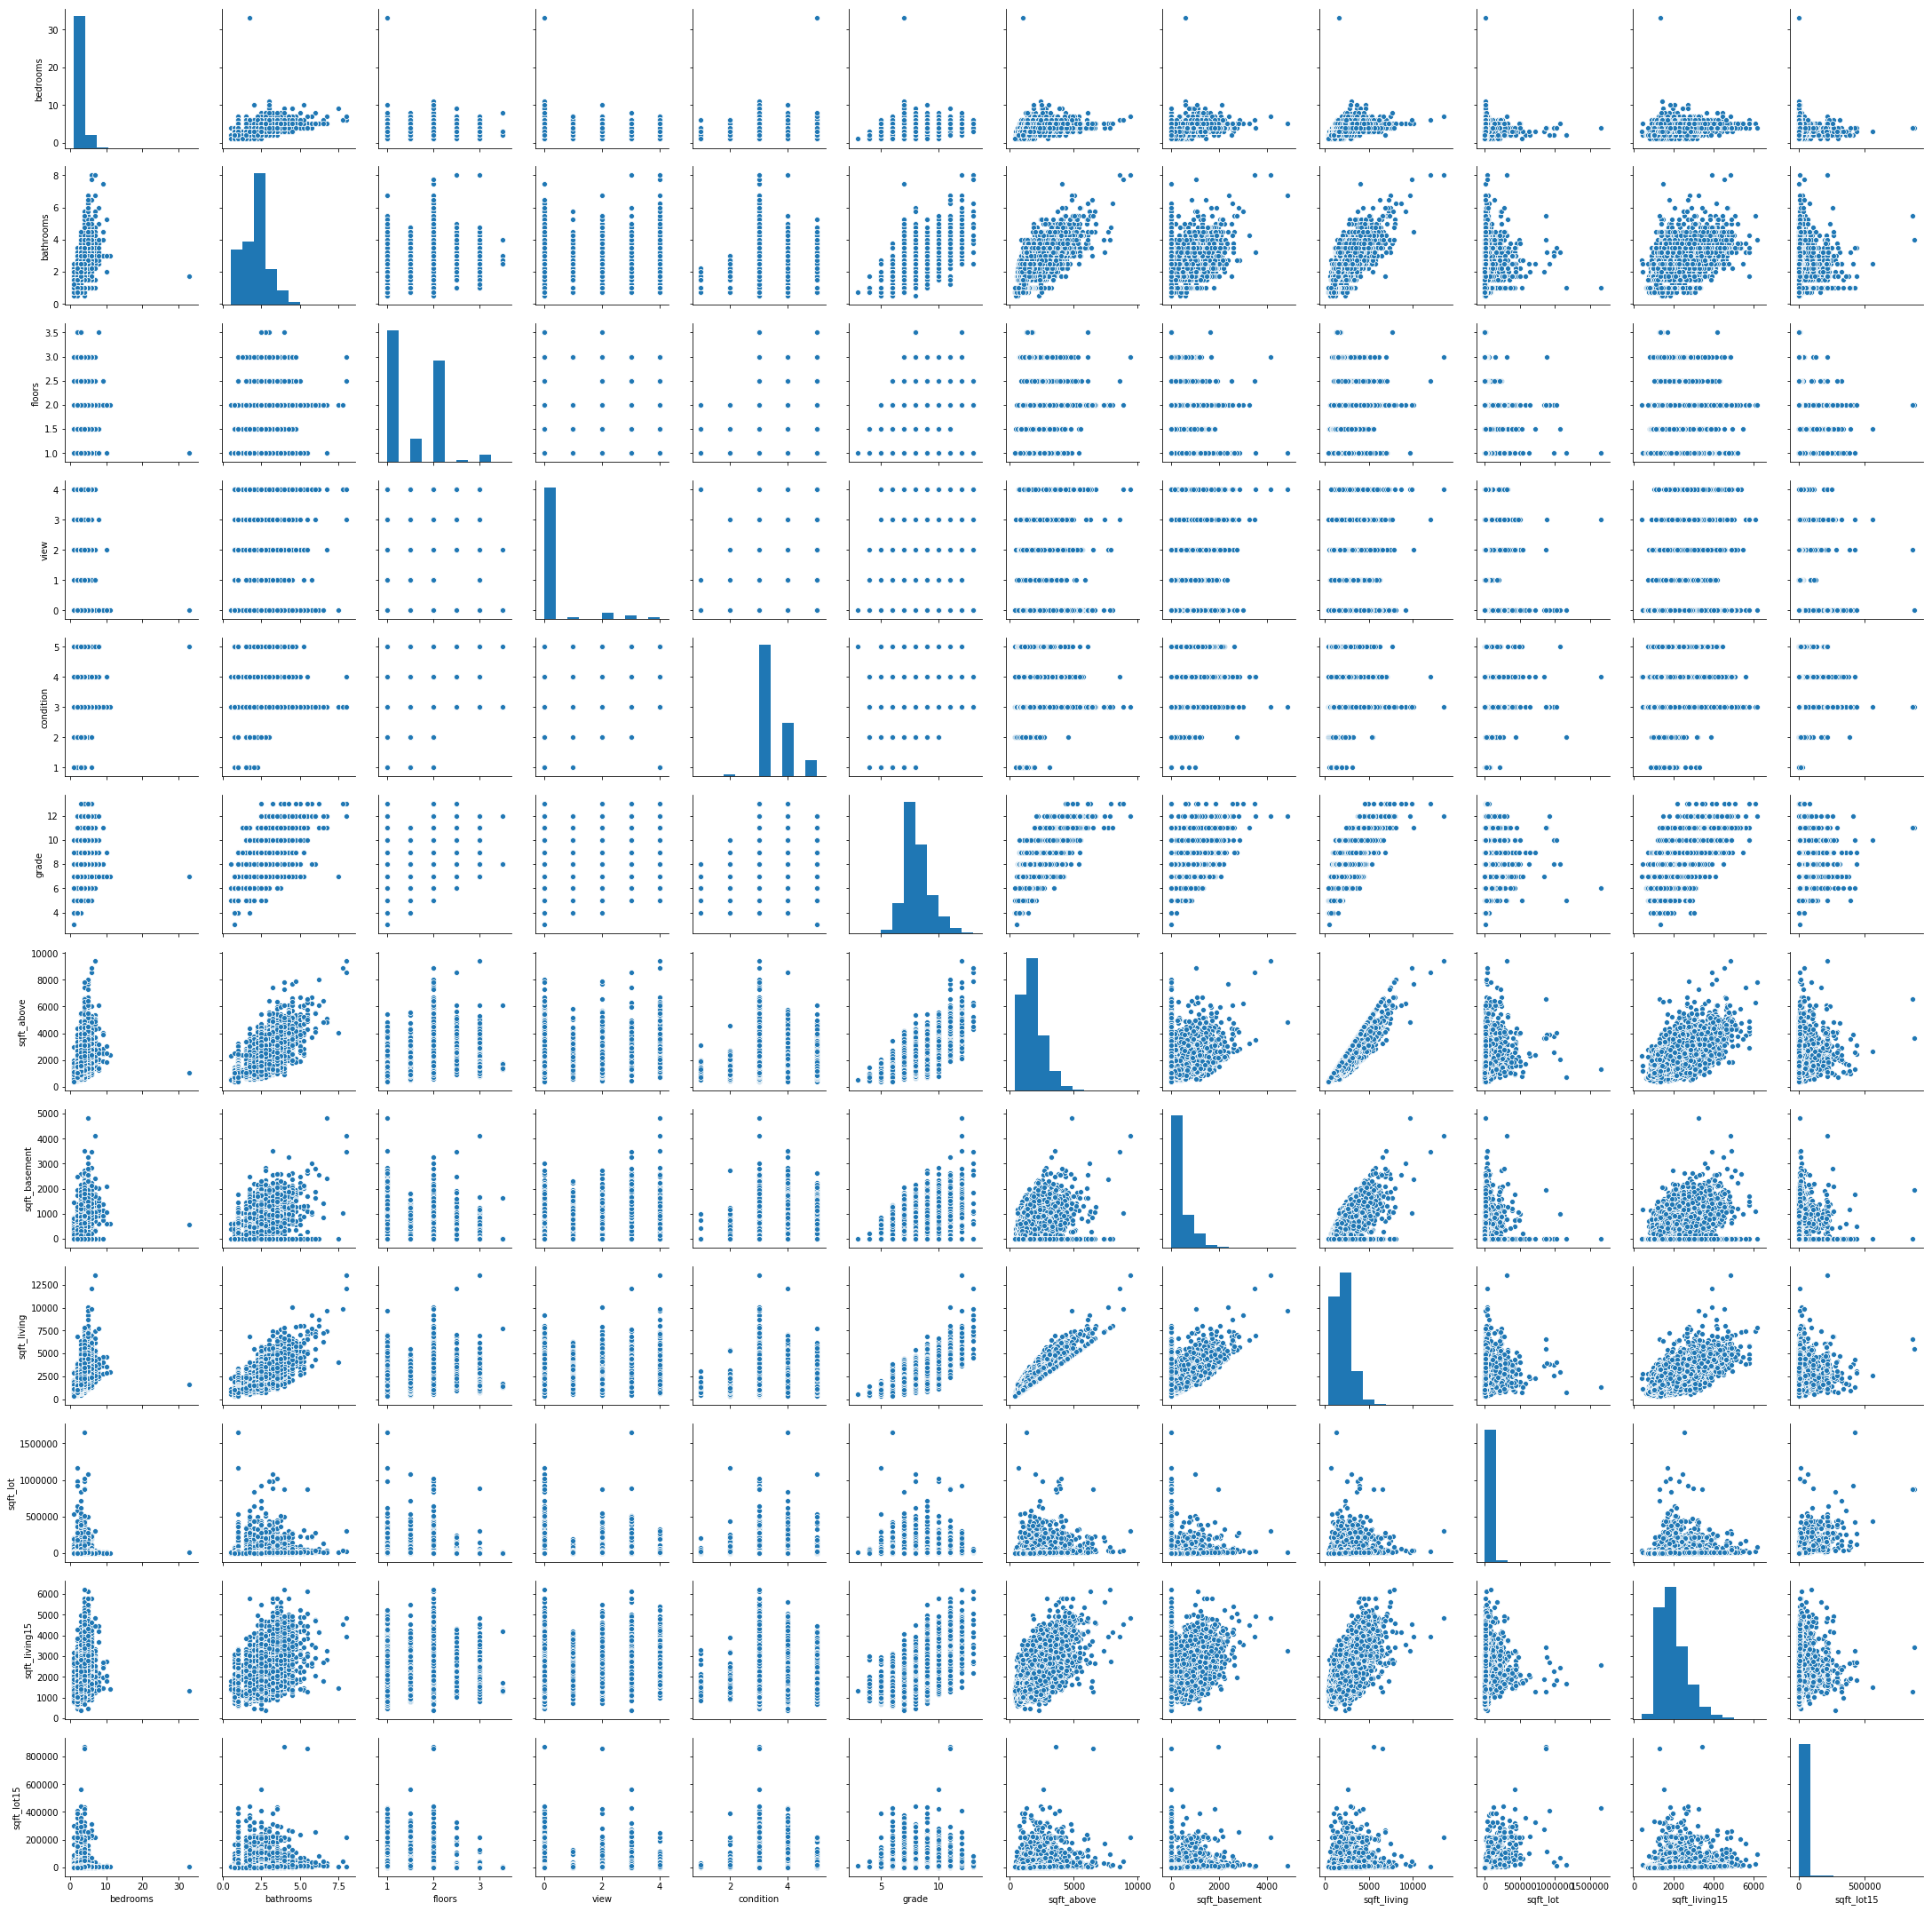

In [34]:
# pairwise relationships
cols = ['bedrooms', 'bathrooms', 'floors', 'view', 'condition', 'grade', 
        'sqft_above', 'sqft_basement', 'sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15']
sns.pairplot(df[cols])
plt.show()

Reducing to the set of variables we care about when searching for outliers, it is easier to see data points that don't appear to fit well within their columns. For example, there is a high **bedroom** value that can be seen as a lone point in the pairwise plots. Undoubtedly, this point is squashing down the column distribution on the diagonal axis. Another example are the few **sqft_lot15** points in the pairwise plots that reduce the column distribution to a single tall bar.

This is a better visualization but it's still a little difficult to process. Let's build boxplots of these columns for a more precise view of the outlier issue.

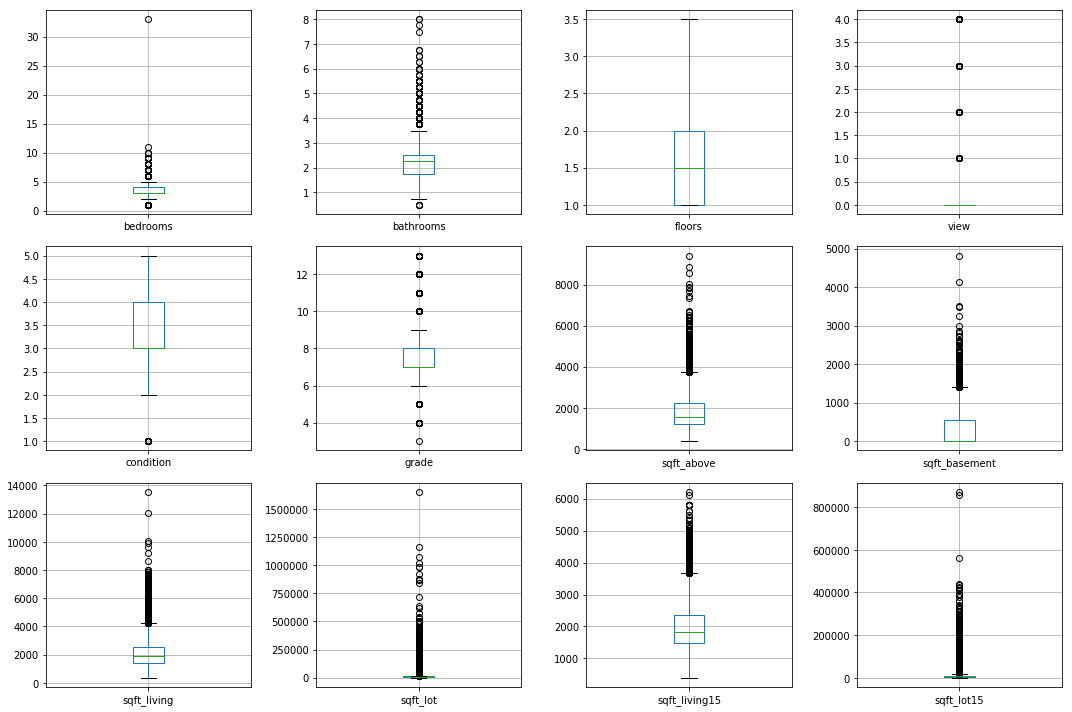

In [35]:
# boxplots of the factors subset
fig, axes = plt.subplots(3, 4, figsize=(15, 10))
for i, x in enumerate(list(df[cols])):
    a = df.boxplot(x, ax=axes.flatten()[i])
plt.tight_layout() 
plt.show()

The box-and-whisker plots provide an excellent view of outliers in the dataset. The two horizontal lines extending above and below the box's whiskers are at set distances from the first and third quartiles (*IQR = Q3 - Q1*). The upper whisker extends to the last datum less than *Q3 + 1.5 IQR*. The lower whisker extends to the first datum greater than *Q1 - 1.5 IQR*. Data beyond these whiskers are considered outliers and are shown as individual points. 

From here, we'll handle outliers differently depending on whether variables are discrete or continuous. The 6 variables **bedroom**, **bathrooms**, **floors**, **view**, **condition**, and **grade** all concern information coded to integer values. We'll examine outlier points for these factors individually. For the continuous factors, the 6 with **sqft** in their names, we'll use the standard outlier determination equation of the boxplots to isolate and remove them.

These plots have provided a qualitative understanding of dataset outliers. Now let's quantify and delete them, starting with the continuous columns.

### 2.2 Handle continous column outliers

In [36]:
# number of column outliers with 1.5 IQR
cont_cols = ['sqft_above', 'sqft_basement', 'sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15']
df_col = df[cont_cols]

# IQR
Q1 = df_col.quantile(0.25)
Q3 = df_col.quantile(0.75)
IQR = Q3 - Q1

# outlier counts
df_out = (df_col < (Q1 - 1.5 * IQR)) | (df_col > (Q3 + 1.5 * IQR))
print(df_out.sum())
print('\n')
print(df_out.sum() / df_out.count())

sqft_above        609
sqft_basement     492
sqft_living       567
sqft_lot         2414
sqft_living15     541
sqft_lot15       2183
dtype: int64


sqft_above       0.028281
sqft_basement    0.022848
sqft_living      0.026330
sqft_lot         0.112102
sqft_living15    0.025123
sqft_lot15       0.101375
dtype: float64


Ther are an impressive number of outliers present in the dataset. 10% of **sqft_lot15** and 11% of **sqft_lot** are considered outliers using the standard form of the outlier equation. This is too much data to remove prior to fitting a model. Depending on model results, we may decide to revisit the question of outliers within the data. For right now, however, let's increase the limit required for a data point to become an outlier.

Let's recalculate the number of outliers using the  (4x) large limits of *Q1 - 6 IQR* and *Q3 + 6 IQR*.

In [37]:
# outlier counts with 6.0 IQR
df_out = (df_col < (Q1 - 6 * IQR)) | (df_col > (Q3 + 6 * IQR))
print(df_out.sum())
print('\n')
print(df_out.sum() / df_out.count())

sqft_above          3
sqft_basement       2
sqft_living         5
sqft_lot         1018
sqft_living15       0
sqft_lot15        957
dtype: int64


sqft_above       0.000139
sqft_basement    0.000093
sqft_living      0.000232
sqft_lot         0.047274
sqft_living15    0.000000
sqft_lot15       0.044441
dtype: float64


The percentage of outlier rows after increasing the threshold is now under 5%. This is considered to be an acceptable loss of data for the increased performance gained by removing data points that skew the dataset's distributions.

Next, we remove the identified outliers.

In [38]:
# list of outlier indices for continuous columns
idx_list = []
idx_list += list(df.index[df_out.sqft_above])
idx_list += list(df.index[df_out.sqft_basement])
idx_list += list(df.index[df_out.sqft_living])
idx_list += list(df.index[df_out.sqft_lot])
idx_list += list(df.index[df_out.sqft_living15])
idx_list += list(df.index[df_out.sqft_lot15])

# set from list
idx_set = [] 
for i in idx_list: 
    if i not in idx_set: 
        idx_set.append(i) 

# continuous results
print('Sum of outliers in continuous columns:', len(idx_list))
print('Number of outlier rows from continuous columns:', len(idx_set))
print('Number of outlier duplicates from continuous columns:', len(idx_list) - len(idx_set))

Sum of outliers in continuous columns: 1985
Number of outlier rows from continuous columns: 1226
Number of outlier duplicates from continuous columns: 759


1,985 outliers will be removed from the 6 continuous columns inspected, those with **sqft** in their name. Among these columns, there were 759 rows with morethan one outlier.

In [39]:
# drop continuous column outliers
df_eda = df.drop(df.index[idx_set])
print('Shape of dataset before removing continous outliers:', df.shape)
print('Shape of dataset after removing continuous outliers:', df_eda.shape)

Shape of dataset before removing continous outliers: (21534, 21)
Shape of dataset after removing continuous outliers: (20308, 21)


The continuous column outliers have been removed. Next, let's look into the discrete column we identified earlier.

### 2.3 Handle discrete column outliers

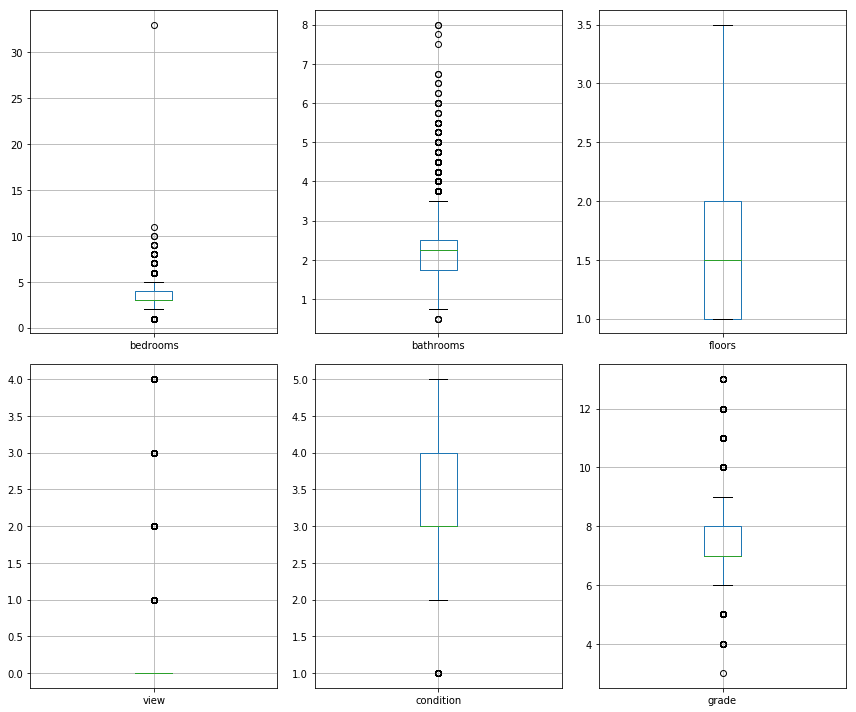

In [40]:
# discrete columns
disc_cols = ['bedrooms', 'bathrooms', 'floors', 'view', 'condition', 'grade']

# boxplots of the factors subset
fig, axes = plt.subplots(2, 3, figsize=(12, 10))
for i, x in enumerate(list(df_eda[disc_cols])):
    a = df_eda.boxplot(x, ax=axes.flatten()[i])
plt.tight_layout() 
plt.show()

For these columns, value interpretation is more directly tied to the problem context. The column **view** informs us how many times a home has been viewed. Since the maximum value (5) is close to the minimum value (0), it does not make sense for us to drop points based on this boxplot. The columns  **condition**, and **grade** provide different grading information on houses. The spread of these variables is also relatively small, with a range of 4 for **condition** and a range of 12 for **grade**. It is not advantageous to remove boxplot-identified outliers from these variables either. The column **floors** does not have any identified outliers.

For the remaining discrete columns **bedrooms** and **bathrooms**, we'll use record information and problem context to decide whether to keep or discard the outliers.

In [41]:
# 5 houses with most bedrooms
df_eda.sort_values(by=['bedrooms'], ascending=False).head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,if_renovated
15856,2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0,0.0,...,7,1040,580.0,1947,98103,47.6878,-122.331,1330,4700,0
8748,1773100755,2014-08-21,520000.0,11,3.00,3000,4960,2.0,0,0.0,...,7,2400,600.0,1918,98106,47.5560,-122.363,1420,4960,1
13301,627300145,2014-08-14,1150000.0,10,5.25,4590,10920,1.0,0,2.0,...,9,2500,2090.0,2008,98004,47.5861,-122.113,2730,10400,0
15147,5566100170,2014-10-29,650000.0,10,2.00,3610,11914,2.0,0,0.0,...,7,3010,600.0,1958,98006,47.5705,-122.175,2040,11914,0
8537,424049043,2014-08-11,450000.0,9,7.50,4050,6504,2.0,0,0.0,...,7,4050,0.0,1996,98144,47.5923,-122.301,1448,3866,0


The house with the most bedrooms has 33 in a living space of 1,620 square feet. The house with the 2nd highest **bedrooms** rank has 11 bedrooms in 3,000 square feet of living space. The 33-bedroom home is clearly an input error. As a result, we will drop this row.

In [42]:
# drop bedroom input error row
df_eda.drop([15856], inplace=True)
print('Shape of dataset after removing discrete outliers:', df_eda.shape)

Shape of dataset after removing discrete outliers: (20307, 21)


For good measure, we check for outliers on the low side of the **bedrooms** column.

In [43]:
df_eda.sort_values(by=['bedrooms'], ascending=True).head(1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,if_renovated
5130,3530470190,2015-05-05,220000.0,1,1.5,1100,3451,1.5,0,0.0,...,8,1100,0.0,1978,98198,47.3829,-122.322,1400,4560,0


The result fits the problem context. It is likely that the lowest number of bedrooms would be 1. 

Let's now look at **bathrooms**.

In [44]:
df_eda.sort_values(by=['bathrooms'], ascending=False).head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,if_renovated
12764,1225069038,2014-05-05,2280000.0,7,8.00,13540,307752,3.0,0,4.0,...,12,9410,4130.0,1999,98053,47.6675,-121.986,4850,217800,0
7245,6762700020,2014-10-13,7700000.0,6,8.00,12050,27600,2.5,0,3.0,...,13,8570,3480.0,1910,98102,47.6298,-122.323,3940,8800,1
9245,9208900037,2014-09-19,6890000.0,6,7.75,9890,31374,2.0,0,4.0,...,13,8860,1030.0,2001,98039,47.6305,-122.240,4540,42730,0
8537,424049043,2014-08-11,450000.0,9,7.50,4050,6504,2.0,0,0.0,...,7,4050,0.0,1996,98144,47.5923,-122.301,1448,3866,0
8085,1924059029,2014-06-17,4670000.0,5,6.75,9640,13068,1.0,1,4.0,...,12,4820,4820.0,1983,98040,47.5570,-122.210,3270,10454,1


The house with the most bathrooms has 8. it is not inconceivable for a house with 6 or 7 bedrooms in a large space could have 8 bathrooms. We will keep these possible outliers. Let's check the low side.

In [45]:
df_eda.sort_values(by=['bathrooms'], ascending=True).head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,if_renovated
12029,2991000160,2014-12-12,312500.0,4,0.50,2300,5570,2.0,0,0.0,...,8,2300,0.0,1996,98092,47.3285,-122.168,1820,6371,0
2259,3971701455,2014-10-03,273000.0,2,0.50,1180,7750,1.0,0,0.0,...,6,590,590.0,1945,98155,47.7690,-122.316,1380,8976,0
10413,7129800036,2015-01-14,109000.0,2,0.50,580,6900,1.0,0,0.0,...,5,580,0.0,1941,98118,47.5135,-122.262,1570,5040,0
11662,7987400316,2014-08-14,255000.0,1,0.50,880,1642,1.0,0,0.0,...,6,500,380.0,1910,98126,47.5732,-122.372,1410,2992,0
17970,3448001975,2015-05-04,351000.0,1,0.75,930,6600,1.0,0,0.0,...,6,930,0.0,1924,98125,47.7127,-122.296,1590,6600,0


While not ideal (or practical), the houses with the lowest bathrooms still have 0.5. We'll also keep these **bathrooms** column rows. Next, let's determine whether the assumptions of linear regression have been met.

### 2.4 Regression Assumptions: Linear Relationship and Normality for continuous columns

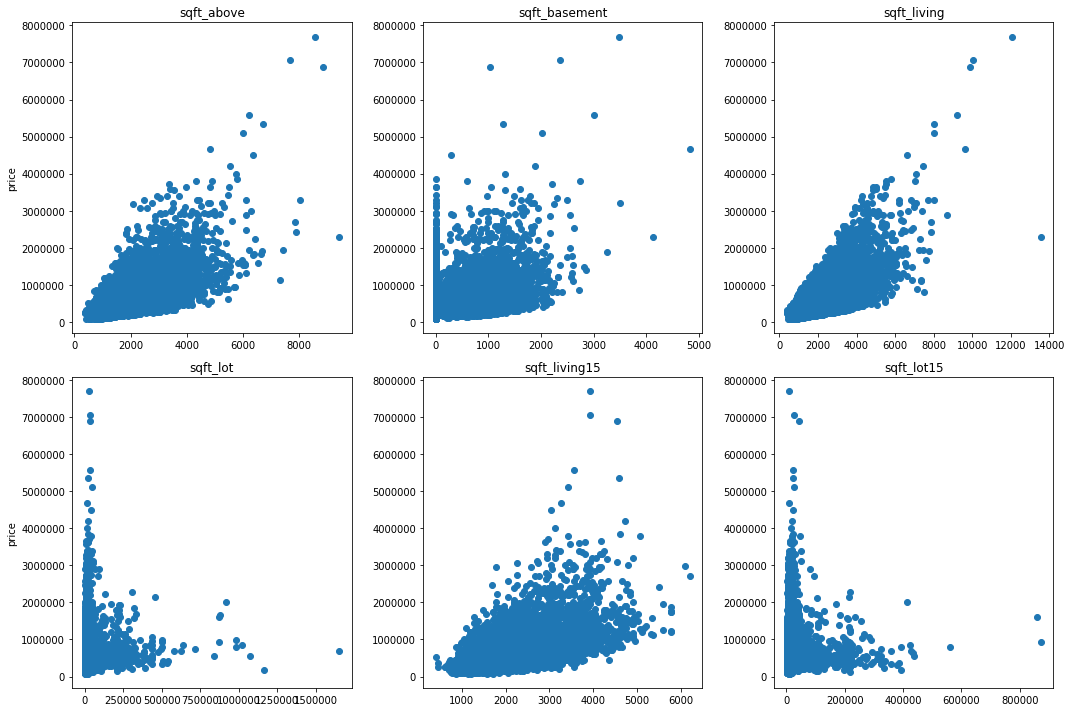

In [46]:
# scatter plots of continuous columns
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
k = 0
for i in range(2):
    for j in range(3): 
        axes[i][j].scatter(df_eda[cont_cols[k]], df_eda.price)
        axes[i][j].set_title(cont_cols[k])
        k += 1
axes[0][0].set(ylabel='price')
axes[1][0].set(ylabel='price')
plt.tight_layout() 
plt.show()

Linear regression assumes the relationship between the independent and dependent variables is linear. This linearity assumption can best be tested with scatter plots. The continuous factor scatter plots above appear to violate this assumption. In particular, **price** does not seem to  increase or decrease linearly as the **sqft_lot** and **sqft_lot15** columns increase.

Applying transformations to these columns may validate the linearity assumption. Now, let's move on to the normality assumption.

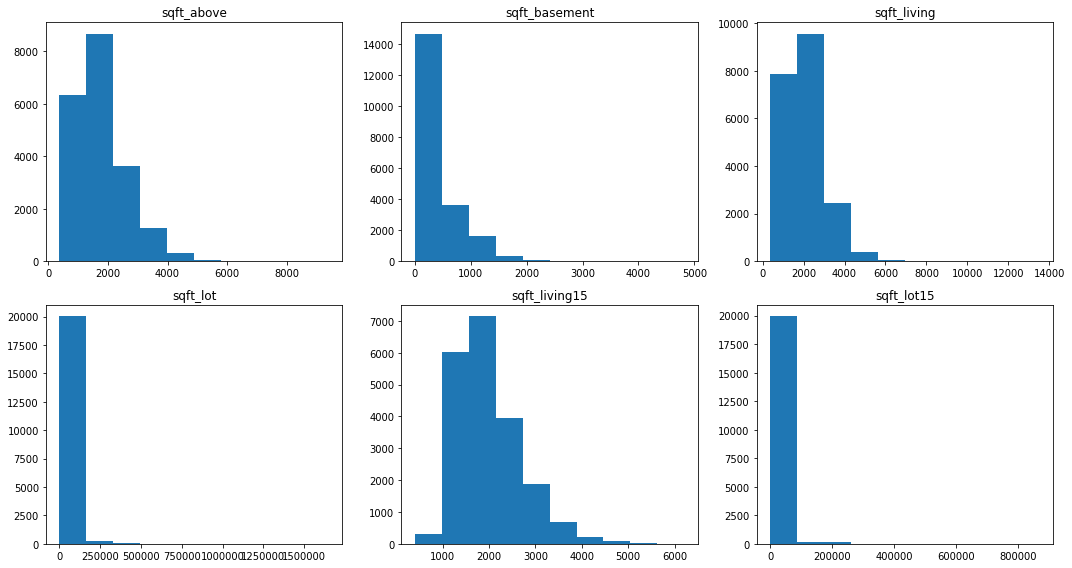

In [47]:
# distributions of continuous columns
f = plt.figure(figsize=(15, 8))
for i in range(len(cont_cols)):    
    ax = plt.subplot(2, 3, i + 1)
    ax.hist(df_eda[cont_cols[i]])
    ax.set_title(cont_cols[i])
plt.tight_layout()
plt.show()

Linear regression analysis also requires all variables to be multivariate normal.  This assumption can be checked with a histogram. None of the histograms have distributions that follow a normal curve. Another way to check for normality is with a goodness of fit test, such as the Kolmogorov-Smirnov test. The KS test is only valid for continuous distributions. 

In [48]:
# perform the Kolmogorov-Smirnov test for goodness of fit

# import necessary libraries
from scipy import stats

# KS test
for i in range(len(cont_cols)):
    print('\nKS Normality Test for continuous variable:', cont_cols[i])
    print(stats.kstest(df_eda[cont_cols[i]], 'norm'))


KS Normality Test for continuous variable: sqft_above
KstestResult(statistic=1.0, pvalue=0.0)

KS Normality Test for continuous variable: sqft_basement
KstestResult(statistic=0.5, pvalue=0.0)

KS Normality Test for continuous variable: sqft_living
KstestResult(statistic=1.0, pvalue=0.0)

KS Normality Test for continuous variable: sqft_lot
KstestResult(statistic=1.0, pvalue=0.0)

KS Normality Test for continuous variable: sqft_living15
KstestResult(statistic=1.0, pvalue=0.0)

KS Normality Test for continuous variable: sqft_lot15
KstestResult(statistic=1.0, pvalue=0.0)


The KS test performs a test of the distribution of an observed random variable, `G(x)`, against a given distribution, `F(x)`. 
The null hypothesis for this test is that the two distributions are identical, `G(x) = F(x)`. None of the p-values from the KS tests for the continuous variables are above the threshold values of 0.05 required to fail to reject the null hypothesis. When data is not normally distributed a non-linear transformation (e.g., log-transformation) may fix this issue. Let's apply transformations to these variables.

In [49]:
# minimum value of continous variables
for i in range(len(cont_cols)):
    print('minimum value for', cont_cols[i], 'is', min(df_eda[cont_cols[i]]))

minimum value for sqft_above is 370
minimum value for sqft_basement is 0.0
minimum value for sqft_living is 370
minimum value for sqft_lot is 520
minimum value for sqft_living15 is 399
minimum value for sqft_lot15 is 651


Applying  a logarithm transformation can help reduce right skewness in our distributions but it cannot be applied to 0 or negative values. Checking the minimum values for our continuous columns informs us that we will need to treat **sqft_basement** a little differently (by adding *1*).

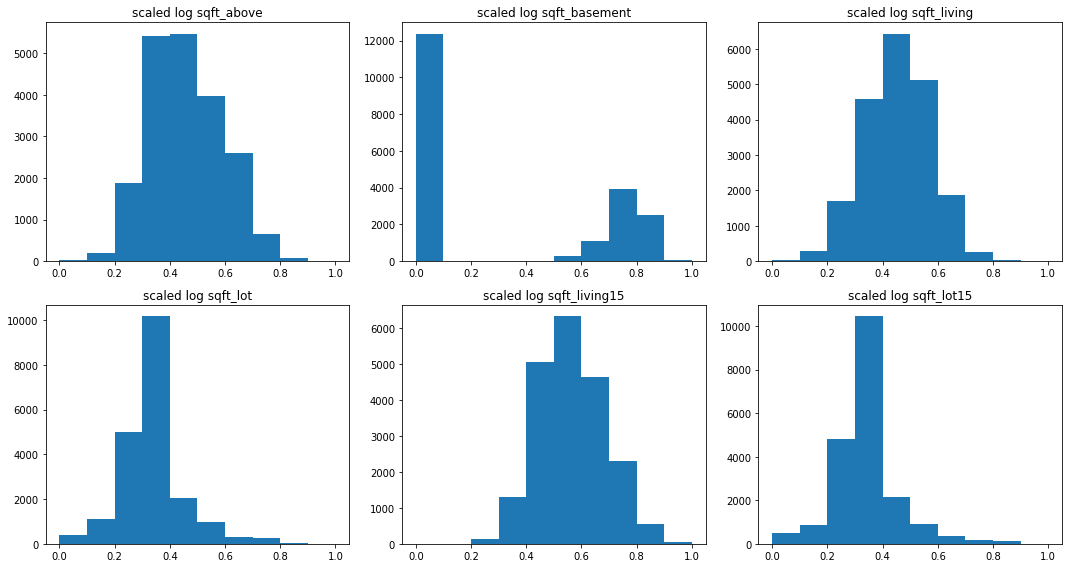

In [50]:
# log transformation and scaling of continuous variables
df_transformed = df_eda.copy()

above_log = np.log(df_eda['sqft_above'])
above_logscaled = (above_log - min(above_log)) / (max(above_log) - min(above_log))
df_transformed['above_ls'] = above_logscaled
df_transformed.drop('sqft_above', axis=1, inplace=True)

basement_log = np.log(df_eda['sqft_basement']+1)
basement_logscaled = (basement_log - min(basement_log)) / (max(basement_log) - min(basement_log))
df_transformed['basement_ls'] = basement_logscaled
df_transformed.drop('sqft_basement', axis=1, inplace=True)

living_log = np.log(df_eda['sqft_living'])
living_logscaled = (living_log - min(living_log)) / (max(living_log) - min(living_log))
df_transformed['living_ls'] = living_logscaled
df_transformed.drop('sqft_living', axis=1, inplace=True)

lot_log = np.log(df_eda['sqft_lot'])
lot_logscaled = (lot_log - min(lot_log)) / (max(lot_log) - min(lot_log))
df_transformed['lot_ls'] = lot_logscaled
df_transformed.drop('sqft_lot', axis=1, inplace=True)

living15_log = np.log(df_eda['sqft_living15'])
living15_logscaled = (living15_log - min(living15_log)) / (max(living15_log) - min(living15_log))
df_transformed['living15_ls'] = living15_logscaled
df_transformed.drop('sqft_living15', axis=1, inplace=True)

lot15_log = np.log(df_eda['sqft_lot15'])
lot15_logscaled = (lot15_log - min(lot15_log)) / (max(lot15_log) - min(lot15_log))
df_transformed['lot15_ls'] = lot15_logscaled
df_transformed.drop('sqft_lot15', axis=1, inplace=True)

# combine transformations
logscaled_cont_names = ['above_ls', 'basement_ls', 'living_ls', 'log_ls', 'living15_ls', 'lot15_ls']

logscaled_cont_titles = ['scaled log sqft_above', 'scaled log sqft_basement', 'scaled log sqft_living', 
                       'scaled log sqft_lot', 'scaled log sqft_living15', 'scaled log sqft_lot15']

logscaled_cont_cols = pd.DataFrame(list(zip(above_logscaled, basement_logscaled, living_logscaled, 
                       lot_logscaled, living15_logscaled, lot15_logscaled)), columns=logscaled_cont_names) 

# plots
f = plt.figure(figsize=(15, 8))
for i in range(len(logscaled_cont_cols.columns)):    
    ax = plt.subplot(2, 3, i + 1)
    ax.hist(logscaled_cont_cols.iloc[:, i])
    ax.set_title(logscaled_cont_titles[i])
plt.tight_layout()
plt.show()

The continuous variables appear much more normal after log transformation, although there seems to be a problem with **sqft_basement**.  In addition to applying a log transformation, the columns are also min-max scaled in order to be of similar ranges. This is because the raw features vary in magnitude. If left unchanged, coefficient sizes will fluctuate in magnitude, as well. This risks giving the false impression that some variables are less important than others.  

In [51]:
# KS Test for log-transformed and scaled continuous columns
for i in range(len(cont_cols)):
    print('\nKS Normality Test for continuous variable:', logscaled_cont_names[i])
    print(stats.kstest(logscaled_cont_cols.iloc[:, i], 'norm'))


KS Normality Test for continuous variable: above_ls
KstestResult(statistic=0.5692320090269299, pvalue=0.0)

KS Normality Test for continuous variable: basement_ls
KstestResult(statistic=0.5, pvalue=0.0)

KS Normality Test for continuous variable: living_ls
KstestResult(statistic=0.5653463667836224, pvalue=0.0)

KS Normality Test for continuous variable: log_ls
KstestResult(statistic=0.5228552110214778, pvalue=0.0)

KS Normality Test for continuous variable: living15_ls
KstestResult(statistic=0.6159915468835224, pvalue=0.0)

KS Normality Test for continuous variable: lot15_ls
KstestResult(statistic=0.5241536372490668, pvalue=0.0)


Although the distributions for the log-transformed factors appear more normal, the KS Tests for these factors reject the null hypothesis of normality. Although the normality assumption is not confirmed, we'll move forward with modeling the transformed features because of their enhanced visual conformance. Next, let's look at the discrete columns.

### 2.5 Regression Assumptions: Linear Relationship and Normality for discrete columns

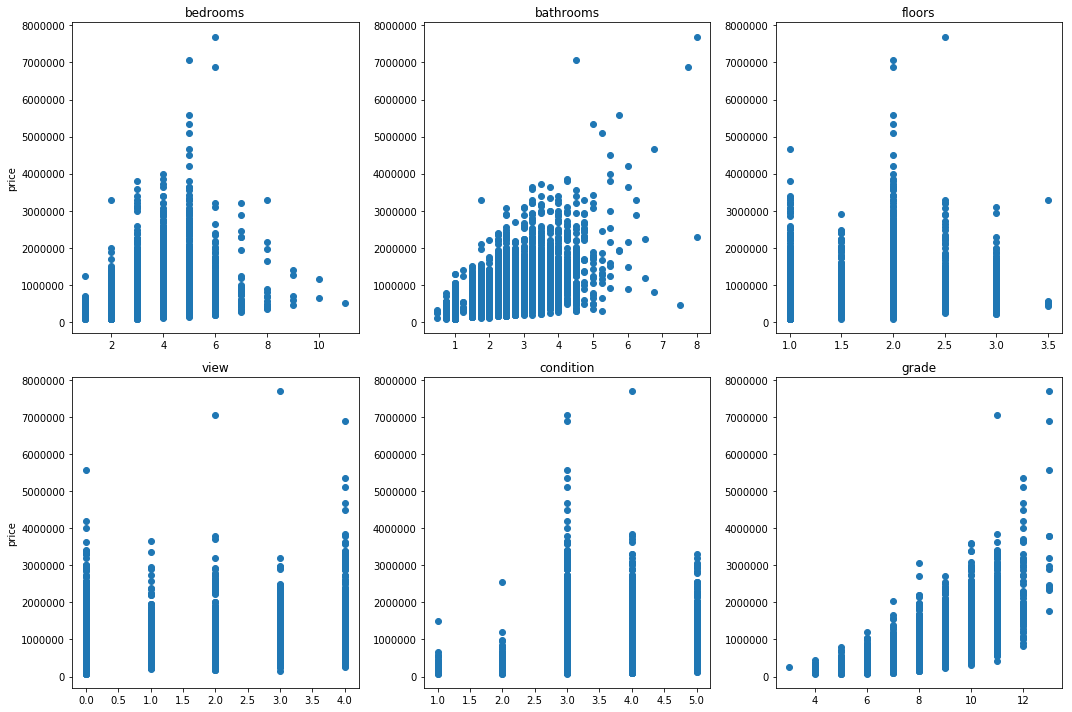

In [52]:
# scatter plots of discrete columns
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
k = 0
for i in range(2):
    for j in range(3): 
        axes[i][j].scatter(df_eda[disc_cols[k]], df_eda.price)
        axes[i][j].set_title(disc_cols[k])
        k += 1
axes[0][0].set(ylabel='price')
axes[1][0].set(ylabel='price')
plt.tight_layout() 
plt.show()

Scatter plots for the discrete column variables do no indicate a linear relationship with the target variable **price**. This view is reminiscent of the histogram behavior of categorical variables. There is a small change in price for **bathrooms** and **grade** but not enough to confirm the assumption. Let's scale the discrete features next.

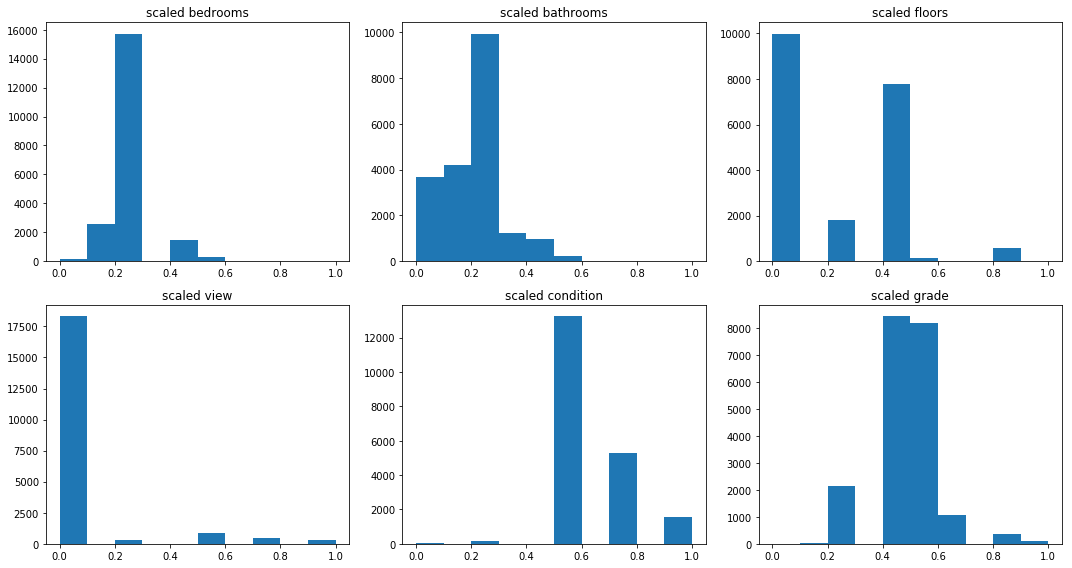


KS Normality Test for discrete variable: bedrooms_s
KstestResult(statistic=0.5310623869397069, pvalue=0.0)

KS Normality Test for discrete variable: bathrooms_s
KstestResult(statistic=0.522932400676984, pvalue=0.0)

KS Normality Test for discrete variable: floors_s
KstestResult(statistic=0.5, pvalue=0.0)

KS Normality Test for discrete variable: view_s
KstestResult(statistic=0.5, pvalue=0.0)

KS Normality Test for discrete variable: condition_s
KstestResult(statistic=0.6823030581125417, pvalue=0.0)

KS Normality Test for discrete variable: grade_s
KstestResult(statistic=0.605403420022212, pvalue=0.0)


In [53]:
# scale the discrete columns
bedrooms_scaled = (df_eda['bedrooms'] - min(df_eda['bedrooms'])) / (max(df_eda['bedrooms']) - min(df_eda['bedrooms']))
df_transformed['bedrooms_s'] = bedrooms_scaled
df_transformed.drop('bedrooms', axis=1, inplace=True)

bathrooms_scaled = (df_eda['bathrooms'] - min(df_eda['bathrooms'])) / (max(df_eda['bathrooms']) - min(df_eda['bathrooms']))
df_transformed['bathrooms_s'] = bathrooms_scaled
df_transformed.drop('bathrooms', axis=1, inplace=True)

floors_scaled = (df_eda['floors'] - min(df_eda['floors'])) / (max(df_eda['floors']) - min(df_eda['floors']))
df_transformed['floors_s'] = floors_scaled
df_transformed.drop('floors', axis=1, inplace=True)

view_scaled = (df_eda['view'] - min(df_eda['view'])) / (max(df_eda['view']) - min(df_eda['view']))
df_transformed['view_s'] = view_scaled
df_transformed.drop('view', axis=1, inplace=True)

condition_scaled = (df_eda['condition'] - min(df_eda['condition'])) / (max(df_eda['condition']) - min(df_eda['condition']))
df_transformed['condition_s'] = condition_scaled
df_transformed.drop('condition', axis=1, inplace=True)

grade_scaled = (df_eda['grade'] - min(df_eda['grade'])) / (max(df_eda['grade']) - min(df_eda['grade']))
df_transformed['grade_s'] = grade_scaled
df_transformed.drop('grade', axis=1, inplace=True)

# combine scaled columns
scaled_disc_titles = ['scaled bedrooms', 'scaled bathrooms', 'scaled floors', 
                       'scaled view', 'scaled condition', 'scaled grade']

scaled_disc_names = ['bedrooms_s', 'bathrooms_s', 'floors_s', 'view_s', 'condition_s', 'grade_s']

scaled_disc_cols = pd.DataFrame(list(zip(bedrooms_scaled, bathrooms_scaled, floors_scaled, view_scaled, condition_scaled, grade_scaled)),
                               columns=scaled_disc_names) 

# histogram plots
f = plt.figure(figsize=(15, 8))
for i in range(len(scaled_disc_cols.columns)):    
    ax = plt.subplot(2, 3, i + 1)
    ax.hist(scaled_disc_cols.iloc[:, i])
    ax.set_title(scaled_disc_titles[i])
plt.tight_layout()
plt.show()

# KS test
for i in range(len(cont_cols)):
    print('\nKS Normality Test for discrete variable:', scaled_disc_names[i])
    print(stats.kstest(scaled_disc_cols.iloc[:, i], 'norm'))

The histograms above reveal the unsurprising fact that the normality assumption also does not apply for the discrete features. But at least these features are scaled now.

In [54]:
# combine the continuous and discrete columns
print(df_transformed.shape)
df_transformed.columns

(20307, 21)


Index(['id', 'date', 'price', 'waterfront', 'yr_built', 'zipcode', 'lat',
       'long', 'if_renovated', 'above_ls', 'basement_ls', 'living_ls',
       'lot_ls', 'living15_ls', 'lot15_ls', 'bedrooms_s', 'bathrooms_s',
       'floors_s', 'view_s', 'condition_s', 'grade_s'],
      dtype='object')

Above we combine the continuous and discrete features. Next, let's take a look at the target feature.

### 2.6 Regression Assumptions: Normality of target variable

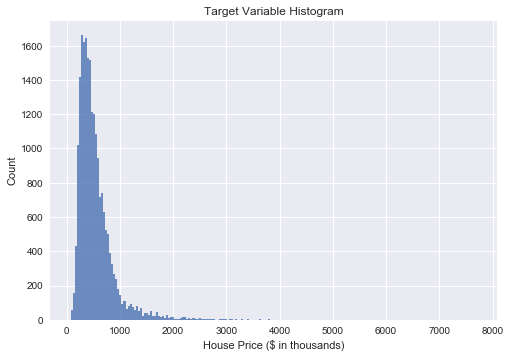


KS Normality Test for target variable: price
KstestResult(statistic=1.0, pvalue=0.0)


In [55]:
# target variable histogram
plt.style.use('seaborn')
plt.hist(df['price']/1000, bins=200, alpha=0.8)
plt.xlabel('House Price ($ in thousands)')
plt.ylabel('Count')
plt.title('Target Variable Histogram')
plt.show()

# target KS Test
print('\nKS Normality Test for target variable: price')
print(stats.kstest(df_eda.price, 'norm'))

The target variable **price** does not follow a normal distribution. This may affect our modeling results. For right now, however, we won't transform the dependent variable. 

Next, let's investigate whether there is any dependency with time found within the **date** column.

Let's start with groups by year.

### 2.7 Time Dependency: How are sales affected by Year? Month? Week?

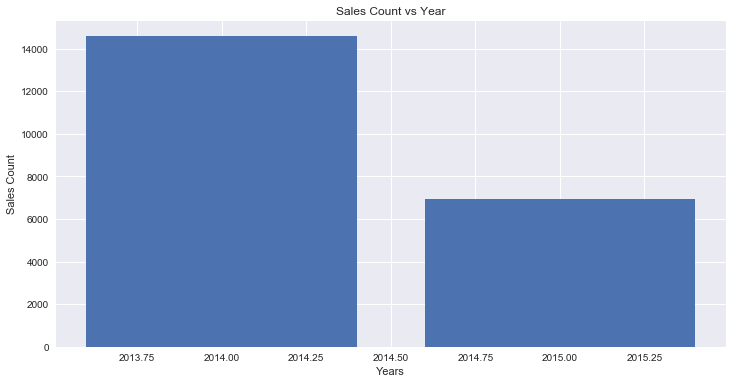

In [56]:
# import necessary libraries
import datetime as dt
import calendar

# relationship to year 
df_year = df.copy()
df_year['year'] = df_year.date.dt.year
df_date = df_year.groupby('year', as_index=False).count()

# year plot
plt.figure(figsize=(12, 6))
plt.bar(df_date['year'], df_date['id'])
plt.grid()
plt.xlabel('Years')
plt.ylabel('Sales Count')
plt.title('Sales Count vs Year')
plt.grid()
plt.show()

and then by month.

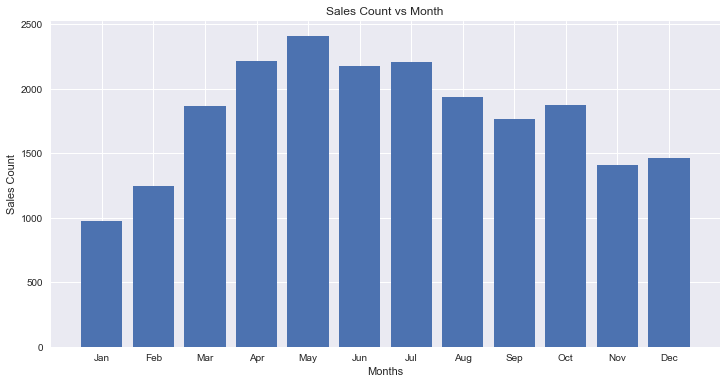

In [57]:
# relationship to month
df_month = df.copy()
df_month['month'] = df_month.date.dt.month
df_date = df_month.groupby('month', as_index=False).count()

# plot
plt.figure(figsize=(12, 6))
plt.bar(df_date['month'], df_date['id'])
plt.grid()
plt.xlabel('Months')
plt.ylabel('Sales Count')
plt.title('Sales Count vs Month')
plt.xticks(np.arange(13), ('','Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'))
plt.grid()
plt.show()

and, finally, by week.

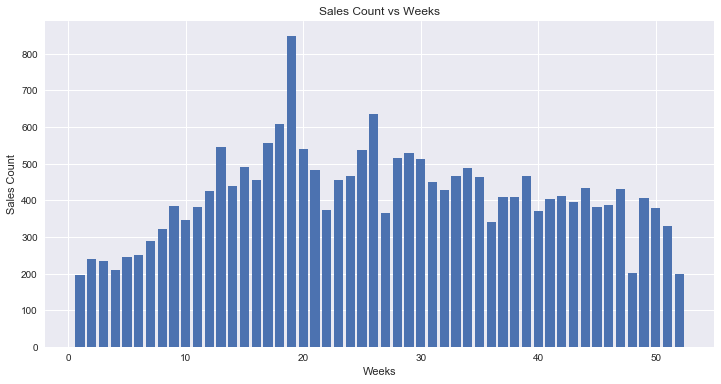

In [58]:
# relationship to week
df_week = df.copy()
df_week['week'] = df_week.date.dt.week
df_date = df_week.groupby('week', as_index=False).count()

# plot
plt.figure(figsize=(12, 6))
plt.bar(df_date['week'], df_date['id'])
plt.grid()
plt.xlabel('Weeks')
plt.ylabel('Sales Count')
plt.title('Sales Count vs Weeks')
plt.grid()
plt.show()

Our investigation on the relationship of sales with time reveals some interesting findings: only two years of data are provided, with 2014 having about twice the records as 2015; there is a seasonal trend in number of house sales, with winter months having the fewest sales and late spring and early summer months having the greatest number; analysis by week shows that certain weeks are outliers, having exceptionally large and small numbers of sales.

Due to the curse of dimensionality, however, it is impractical to use the current version of **date** in our models. The curse of dimensionality refers to the phenomena that arise when analyzing data in high-dimensional spaces. As dimensionality increases, the volume of the problem space increases so much that the available data become sparse. Since sparsity is an issue for methods that require statistical significance, it is important to keep dimensionality in check. In order to obtain a statistically relevant result, the amount of data needed to support the conclusion generally grows exponentially with dimensionality.

To manage dimensionality with the **date** feature, instead of using all available values, we'll engineer new features using the months houses are sold. This is a practical choice since we'd like to be able to predict home prices with this information. Using years can only tell us about the past while using weeks would introduce many more variables into our model. Month indicators are a useful compromise between identifying variation and increasing dimensionality.

In [59]:
# bin date column to month dummy variables
df_transformed['month']= pd.DatetimeIndex(df_transformed['date']).month
df_transformed = pd.get_dummies(df_transformed, columns=['month'])
print('-- Dimensionality reduction --')
print('Number of unique dates:', len(df_eda.date.unique()))
print('Number of unique months:', len(pd.DatetimeIndex(df_transformed['date']).month.unique()))
df_transformed.drop('date', axis=1, inplace=True)
df_transformed.columns

-- Dimensionality reduction --
Number of unique dates: 371
Number of unique months: 12


Index(['id', 'price', 'waterfront', 'yr_built', 'zipcode', 'lat', 'long',
       'if_renovated', 'above_ls', 'basement_ls', 'living_ls', 'lot_ls',
       'living15_ls', 'lot15_ls', 'bedrooms_s', 'bathrooms_s', 'floors_s',
       'view_s', 'condition_s', 'grade_s', 'month_1', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12'],
      dtype='object')

Next, let's investigate whether there is any dependency with location found within the **zipcode** column.

### 2.8 Location Dependency: How are sales affected by ZIP Code? Latitude? Longitude?

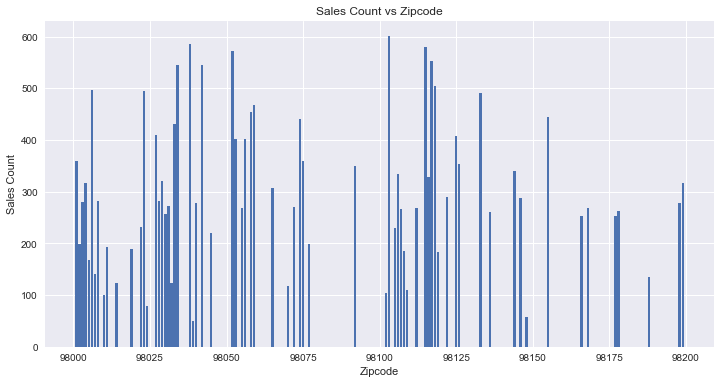

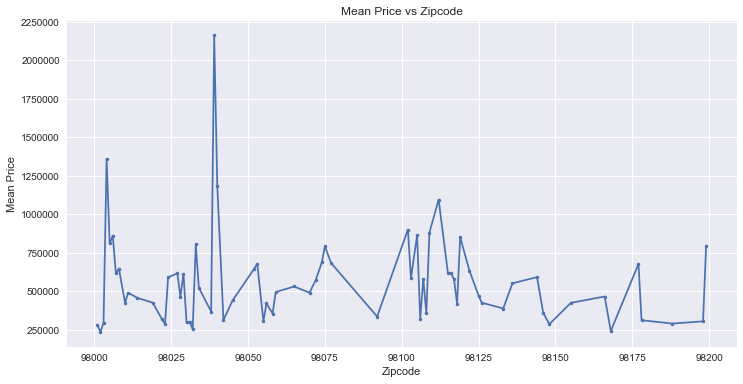

Number of Zipcodes: 70


In [60]:
# relationship to zipcode
df_zip = df.copy()
df_zipcode = df_zip.groupby('zipcode', as_index=False).count()

# sales count plot
plt.figure(figsize=(12, 6))
plt.bar(df_zipcode['zipcode'], df_zipcode['id'])
plt.grid()
plt.xlabel('Zipcode')
plt.ylabel('Sales Count')
plt.title('Sales Count vs Zipcode')
plt.grid()
plt.show()

# mean price plot
plt.figure(figsize=(12, 6))
df_zip = df_zip[['zipcode', 'price']]
df_meanzip = df_zip.groupby('zipcode').mean()
plt.plot(df_meanzip, '.-')
plt.title('Mean Price vs Zipcode')
plt.xlabel('Zipcode')
plt.ylabel('Mean Price')
plt.show()

# zipcode count
print('Number of Zipcodes:', len(df.zipcode.unique()))

There's a big relationship between sales and zipcode. In the first plot above we can see that certain zipcodes have far more sales numbers in the dataset than others. The second plot shows us that one zipcode is an outlier with a mean sales price of nearly \\$2,250,000. By comparison, the second highest zipcode has a mean sale price of just over \\$1,250,000. Beyond this, price are generally well below \\$1,000,000.

Continuing with the investigation of location relationships, let's look at **lat** and **long**.


Stats for lat and long:


,lat,long
count,21534.000000,21534.000000
mean,47.560180,-122.213948
std,0.138528,0.140735
min,47.155900,-122.519000
25%,47.471200,-122.328000
50%,47.571900,-122.230000
75%,47.678100,-122.125000
max,47.777600,-121.315000


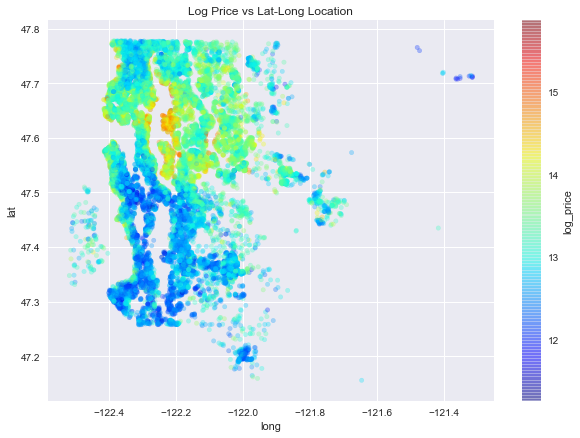

In [61]:
# relationship to lat and long
df_latlong = df.copy()
price = df_latlong.price
df_latlong['log_price']= np.log(price)

# plot
df_latlong.plot(kind="scatter", x="long", y="lat", title = 'Log Price vs Lat-Long Location',alpha=0.3, 
                figsize=(10, 7), c='log_price', cmap=plt.get_cmap("jet"), colorbar=True, sharex=False);

print('\nStats for lat and long:')
df_latlong.describe()[['lat', 'long']]

The heatmap of latitidue and longitude positions improves upon the variation seen with zipcode. There is a spatial separation of high and low priced homes occurring at a latitude value of about 47.5, with the expensive homes at higher latitudes. Additionally, the most expensive homes are located toward the central longitude values while the cheapest homes are generally found at the edges. 

Due to the curse of dimensionality, however, it is impractical to use the current version of **lat** and **long** (and **zipcode**) in our models.

To manage dimensionality with location-based features, instead of using all available values, we'll engineer new features using the quartiles of the **lat** and **long** columns.

In [62]:
# bin lat and long to dummy columns
df_transformed['lat25'] = df_eda.lat.map(lambda x: 1 if x <= 47.471200 else 0)
df_transformed['lat50'] = df_eda.lat.map(lambda x: 1 if x > 47.471200 and x <= 47.571900 else 0)
df_transformed['lat75'] = df_eda.lat.map(lambda x: 1 if x > 47.571900 and x <= 47.678100 else 0)
df_transformed['lat100'] = df_eda.lat.map(lambda x: 1 if x >= 47.678100 else 0)
df_transformed.drop('lat', axis=1, inplace=True)

df_transformed['long25'] = df_eda.long.map(lambda x: 1 if x <= -122.328000 else 0)
df_transformed['long50'] = df_eda.long.map(lambda x: 1 if x > -122.328000 and x <= -122.230000 else 0)
df_transformed['long75'] = df_eda.long.map(lambda x: 1 if x > -122.230000 and x <= -122.125000 else 0)
df_transformed['long100'] = df_eda.long.map(lambda x: 1 if x >= -122.125000 else 0)
df_transformed.drop('long', axis=1, inplace=True)
df_transformed.drop('zipcode', axis=1, inplace=True)

df_transformed.columns

Index(['id', 'price', 'waterfront', 'yr_built', 'if_renovated', 'above_ls',
       'basement_ls', 'living_ls', 'lot_ls', 'living15_ls', 'lot15_ls',
       'bedrooms_s', 'bathrooms_s', 'floors_s', 'view_s', 'condition_s',
       'grade_s', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'month_12', 'lat25', 'lat50', 'lat75', 'lat100', 'long25', 'long50',
       'long75', 'long100'],
      dtype='object')

Next, let's inspect the relationship with **yr_built**.

### 2.9 Construction Dependency: How are sales affected by the Year Built?

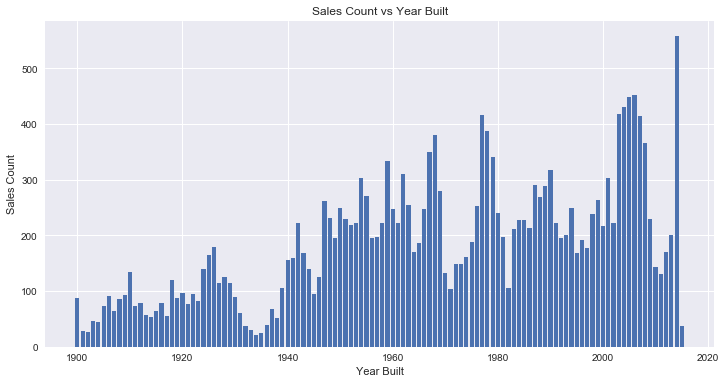

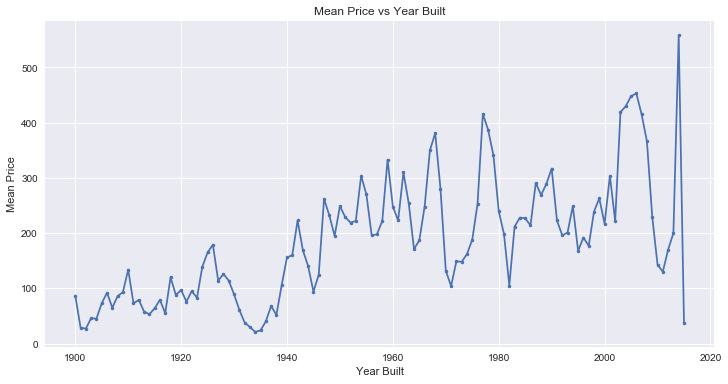

Number of Years Built: 116

Stats for yr_built:


count    21534.000000
mean      1971.002275
std         29.376044
min       1900.000000
25%       1951.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64

In [63]:
# relationship with yr_built
df_yb = df.copy()
df_year = df_yb.groupby('yr_built', as_index=False).count()

# sales count plot
plt.figure(figsize=(12, 6))
plt.bar(df_year['yr_built'], df_year['id'])
plt.grid()
plt.xlabel('Year Built')
plt.ylabel('Sales Count')
plt.title('Sales Count vs Year Built')
plt.grid()
plt.show()

# mean price plot
plt.figure(figsize=(12, 6))
df_year = df_year[['yr_built', 'price']]
df_meanyr = df_year.groupby('yr_built').mean()
plt.plot(df_meanyr, '.-')
plt.title('Mean Price vs Year Built')
plt.xlabel('Year Built')
plt.ylabel('Mean Price')
plt.show()

# year built info
print('Number of Years Built:', len(df.yr_built.unique()))
print('\nStats for yr_built:')
df.yr_built.describe()

There is a very strong and sensible relationship between price and year built. Unsurprisingly, the later a house is built, the more expensive it is to purchase. Due to the curse of dimensionality, however, it is impractical to use the current version of **yr_built** in our models.

To manage dimensionality with **yr_built**, instead of using all 116 years, we'll engineer a new feature using the quartiles of the column.

In [64]:
# bin yr_built to dummy columns
df_transformed['yrbuilt_25'] = df_eda.yr_built.map(lambda x: 1 if x <= 1951 else 0)
df_transformed['yrbuilt_50'] = df_eda.yr_built.map(lambda x: 1 if x > 1951 and x <= 1975 else 0)
df_transformed['yrbuilt_75'] = df_eda.yr_built.map(lambda x: 1 if x > 1975 and x <= 1997 else 0)
df_transformed['yrbuilt_100'] = df_eda.yr_built.map(lambda x: 1 if x >= 1997 else 0)
df_transformed.drop('yr_built', axis=1, inplace=True)
df_transformed.columns

Index(['id', 'price', 'waterfront', 'if_renovated', 'above_ls', 'basement_ls',
       'living_ls', 'lot_ls', 'living15_ls', 'lot15_ls', 'bedrooms_s',
       'bathrooms_s', 'floors_s', 'view_s', 'condition_s', 'grade_s',
       'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'lat25', 'lat50', 'lat75', 'lat100', 'long25', 'long50', 'long75',
       'long100', 'yrbuilt_25', 'yrbuilt_50', 'yrbuilt_75', 'yrbuilt_100'],
      dtype='object')

This finishes the exploratory data analysis phase. Many changes have taken place in order to benefit the reliability of conclusions made from the regression models we will build: the **id** column was dropped; outliers were scrubbed; and, dummy variables were made to encapsulate dependencies on time (**date**), location (**lat**, **long**, **zipcode**) and house information (**yr_renovated**, **yr_built**). Let's take another look at the dataset that will be used to train our models as a final EDA action.

## 2.10 Review the dataset 

In [65]:
# processed dataset
df_transformed.drop('id', axis=1, inplace=True)
df_transformed.head()

,price,waterfront,if_renovated,above_ls,basement_ls,living_ls,lot_ls,living15_ls,lot15_ls,bedrooms_s,...,lat75,lat100,long25,long50,long75,long100,yrbuilt_25,yrbuilt_50,yrbuilt_75,yrbuilt_100
0,221900.0,0,0,0.358392,0.000000,0.322166,0.295858,0.441342,0.300162,0.2,...,0,0,0,1,0,0,0,1,0,0
1,538000.0,0,1,0.546652,0.706774,0.538392,0.326644,0.525882,0.342058,0.2,...,0,1,0,1,0,0,1,0,0,0
2,180000.0,0,0,0.226478,0.000000,0.203585,0.366664,0.699256,0.349544,0.1,...,0,1,0,1,0,0,1,0,0,0
3,604000.0,0,0,0.322322,0.803532,0.463123,0.280700,0.446739,0.283185,0.3,...,0,0,1,0,0,0,0,1,0,0
4,510000.0,0,0,0.467563,0.000000,0.420302,0.340224,0.548854,0.339562,0.2,...,1,0,0,0,0,1,0,0,1,0


## 3. Modeling

Let's begin the modeling phase with feature selection. Our first task in selecting features to include in the model is to check for multicollinearity. Multicollinearity is the phenomenon where one predictor variable in a multiple regression model can be predicted from the others with high accuracy. This occurs when the independent variables are too highly correlated with each other. In the presence of this issue, the coefficient estimates of the multiple regression will move erratically in response to small changes in the model. Multicollinearity affects calculations regarding individual predictors. A multivariate regression model with collinear predictors can indicate how well the entire group of predictors predicts the outcome variable, but it may not give valid results about any individual predictor.

### 3.1 Regression Assumptions: Multicollinearity

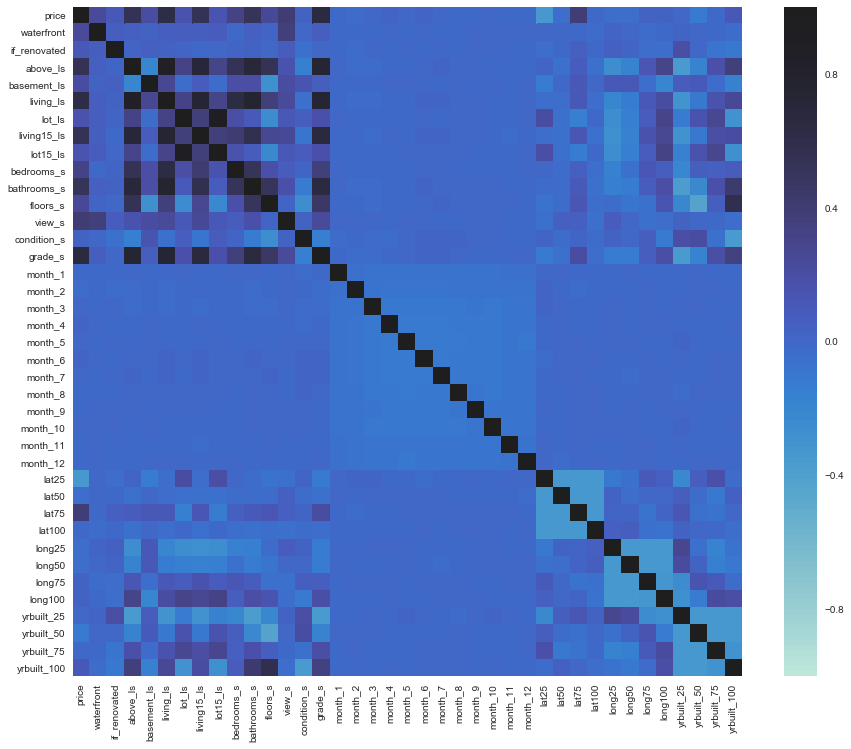

In [66]:
# correlation heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(df_transformed.corr(), vmax=1.0, vmin=-1.0, square=True, fmt='.2f', annot=False, center=1.0,  
            cbar_kws={"shrink": 0.82}, yticklabels=df_transformed.columns.values, xticklabels=df_transformed.columns.values)
plt.show()

The correlation heatmap gives us an indication that some independent variables are highly correlated but it is difficult to read. Let's look at this information in statistic form.

In [67]:
# VIF factors

# import necessary libraries
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF test
features = "+".join(col for col in df_transformed.columns if col != 'price')
y, X = dmatrices('price ~' + features, df_transformed, return_type='dataframe')
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns                 
vif.round(1)

C:\Users\IBM\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\regression\linear_model.py:1543: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\IBM\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,0.0,Intercept
1,1.2,waterfront
2,1.1,if_renovated
3,26.5,above_ls
4,6.7,basement_ls
5,27.2,living_ls
6,7.0,lot_ls
7,2.9,living15_ls
8,6.7,lot15_ls
9,1.9,bedrooms_s


The Variance Inflation Factors above give us the ability to quantitatively analyze the presence of multicollinearity. If VIF > 5, there is an indication that multicollinearity may be present. If VIF > 10 there is definitely multicollinearity present among the variables.

There are many reasons for VIF values to be high. One of the largest and most persistent is the Dummy Variable Trap. The Dummy Variable Trap is a scenario in which one variable can be predicted from the others (i.e., multicollinearity). The solution to the dummy variable trap is to drop one of the categorical variables. If there are `m` categories, use `m-1` in the model. The category left becomes the reference category. The fit values of the remaining categories represent the change from this reference.

Let's address the high VIF value problem by removing reference values and one of the square footage columns. Information from this square footage column can later be recalculated using the remaining house space columns.

In [68]:
# drop reference categories
df_m = df_transformed.copy()
df_m.drop('month_1', axis=1, inplace=True) # sales month colums: January
df_m.drop('lat25', axis=1, inplace=True) # latitude columns: <= 47.471200
df_m.drop('long25', axis=1, inplace=True) # longitude columns:  <= -122.328000
df_m.drop('yrbuilt_25', axis=1, inplace=True) # year built columns: <= 1951
df_m.drop('living_ls', axis=1, inplace=True) # sqft_living = sqft_basement + sqft_above

# VIF test
features = "+".join(col for col in df_m.columns if col != 'price')
y, X = dmatrices('price ~' + features, df_m, return_type='dataframe')
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns     
vif.round(1)

,VIF Factor,features
0,80.6,Intercept
1,1.2,waterfront
2,1.1,if_renovated
3,5.9,above_ls
4,1.9,basement_ls
5,7.0,lot_ls
6,2.9,living15_ls
7,6.7,lot15_ls
8,1.8,bedrooms_s
9,3.3,bathrooms_s


None of the VIF are above 10. This is great. We appear to have effectively handled multicollinearity.

Next, let's build a baseline model.

### 3.2 Baseline Model

In [69]:
# import necessary libraries
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

# baseline model
formula = 'price ~' + features
model_1 = ols(formula=formula, data=df_m).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     1426.
Date:                Thu, 02 Jan 2020   Prob (F-statistic):               0.00
Time:                        23:33:20   Log-Likelihood:            -2.7672e+05
No. Observations:               20307   AIC:                         5.535e+05
Df Residuals:                   20273   BIC:                         5.538e+05
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -6.833e+05   1.26e+04    -54.078      0.000   -7.08e+05   -6.59e+05
waterfront    5.703e+05   1.76e+04     32.421      0.000    5.36e+05    6.05e+05
if_renovated  4.947e+04   8181.304      6.047      0.000    3.34e+04    6.55e+04
above_ls      6.118e+05    2.6e+04     23.574      0.000    5.61e+05    6.63e+05
basement_ls   6.454e+04   5230.236     12.339      0.000    5.43e+04    7.48e+04
lot_ls          2.8e+05   3.32e+04      8.428      0.000    2.15e+05    3.45e+05
living15_ls   1.053e+05      2e+04      5.265      0.000    6.61e+04    1.44e+05
lot15_ls     -5.123e+04   3.22e+04     -1.591      0.112   -1.14e+05    1.19e+04
bedrooms_s    -1.66e+05   2.12e+04     -7.839      0.000   -2.07e+05   -1.24e+05
bathrooms_s   5.658e+05   2.51e+04     22.569      0.000    5.17e+05    6.15e+05
floors_s      -9.01e+04   1.07e+04     -8.434      0.000   -1.11e+05   -6.92e+04
view_s        2.593e+05   8585.792     30.203      0.000    2.42e+05    2.76e+05
condition_s   1.511e+05   9735.052     15.526      0.000    1.32e+05     1.7e+05
grade_s        1.18e+06   2.18e+04     54.147      0.000    1.14e+06    1.22e+06
month_2       1.264e+04   8832.857      1.431      0.153   -4677.597    2.99e+04
month_3       3.226e+04   8161.312      3.953      0.000    1.63e+04    4.83e+04
month_4       3.094e+04   7936.425      3.899      0.000    1.54e+04    4.65e+04
month_5       8089.3226   7850.897      1.030      0.303   -7299.072    2.35e+04
month_6      -3562.7163   7948.658     -0.448      0.654   -1.91e+04     1.2e+04
month_7      -5978.5684   7942.501     -0.753      0.452   -2.15e+04    9589.376
month_8      -3969.5969   8115.965     -0.489      0.625   -1.99e+04    1.19e+04
month_9      -8070.5225   8243.227     -0.979      0.328   -2.42e+04    8086.871
month_10       235.8519   8159.512      0.029      0.977   -1.58e+04    1.62e+04
month_11     -6939.9281   8611.265     -0.806      0.420   -2.38e+04    9938.850
month_12     -5412.1160   8532.489     -0.634      0.526   -2.21e+04    1.13e+04
lat50         1.421e+05   4186.739     33.929      0.000    1.34e+05     1.5e+05
lat75         3.179e+05   4550.769     69.857      0.000    3.09e+05    3.27e+05
lat100        1.808e+05   4150.557     43.559      0.000    1.73e+05    1.89e+05
long50        5996.6418   4028.390      1.489      0.137   -1899.329    1.39e+04
long75        2.211e+04   4559.806      4.848      0.000    1.32e+04     3.1e+04
long100      -5.021e+04   4918.789    -10.208      0.000   -5.99e+04   -4.06e+04
yrbuilt_50    -1.06e+05   4405.910    -24.054      0.000   -1.15e+05   -9.73e+04
yrbuilt_75   -1.607e+05   5159.008    -31.158      0.000   -1.71e+05   -1.51e+05
yrbuilt_100  -1.248e+05   6107.141    -20.430      0.000   -1.37e+05   -1.13e+05
==============================================================================
Omnibus

Our baseline model has an R-squared value of 0.700. This is fairly good. The model explains 70% of the total variation. The remaining 30% is variance explained by error. There's a lot of information in these tables. Since this is our first pass, let's focus on what we can do to improve the model. 

The coefficient reports section provides insight on the statistical significance of each of the independent variables. The P>|t| column in this section provides the p-values. For this measurement, the null-hypothesis is that the coefficient equals 0. If the p-value is less than the confidence level of 0.05 then there is a statistically significant relationship between that term and the response variable. 

So, given the information in this model summary section, let's remove the variables that have not been shown to be statistically significant.

### 3.3 Model with p-value feature reduction

In [70]:
# remove terms from baseline model with p < 0.05
remove_dict = dict(filter(lambda elem: elem[1] > 0.05, model_1.pvalues.items()))

# new model with high p-value features removed
df_m2 = df_m.copy()
df_m2.drop(list(remove_dict.keys()), axis=1,inplace=True)
features = "+".join(col for col in df_m2.columns if col != 'price')
formula = 'price ~' + features
model_2 = ols(formula=formula, data=df_m2).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     2137.
Date:                Thu, 02 Jan 2020   Prob (F-statistic):               0.00
Time:                        23:33:20   Log-Likelihood:            -2.7673e+05
No. Observations:               20307   AIC:                         5.535e+05
Df Residuals:                   20284   BIC:                         5.537e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -6.82e+05   1.09e+04    -62.539      0.000   -7.03e+05   -6.61e+05
waterfront    5.688e+05   1.76e+04     32.358      0.000    5.34e+05    6.03e+05
if_renovated  4.882e+04   8176.726      5.971      0.000    3.28e+04    6.48e+04
above_ls      6.121e+05   2.59e+04     23.604      0.000    5.61e+05    6.63e+05
basement_ls    6.47e+04   5224.917     12.383      0.000    5.45e+04    7.49e+04
lot_ls        2.357e+05   1.78e+04     13.233      0.000    2.01e+05    2.71e+05
living15_ls    1.04e+05   1.98e+04      5.260      0.000    6.53e+04    1.43e+05
bedrooms_s   -1.634e+05   2.12e+04     -7.722      0.000   -2.05e+05   -1.22e+05
bathrooms_s   5.664e+05   2.51e+04     22.603      0.000    5.17e+05    6.16e+05
floors_s      -9.03e+04   1.07e+04     -8.460      0.000   -1.11e+05   -6.94e+04
view_s         2.59e+05   8568.350     30.225      0.000    2.42e+05    2.76e+05
condition_s   1.493e+05   9711.376     15.373      0.000     1.3e+05    1.68e+05
grade_s       1.178e+06   2.17e+04     54.150      0.000    1.13e+06    1.22e+06
month_3       3.362e+04   5042.472      6.667      0.000    2.37e+04    4.35e+04
month_4       3.224e+04   4662.649      6.914      0.000    2.31e+04    4.14e+04
lat50          1.42e+05   4182.340     33.951      0.000    1.34e+05     1.5e+05
lat75         3.179e+05   4547.055     69.918      0.000    3.09e+05    3.27e+05
lat100        1.807e+05   4150.209     43.537      0.000    1.73e+05    1.89e+05
long75        1.888e+04   3980.637      4.743      0.000    1.11e+04    2.67e+04
long100      -5.396e+04   4372.977    -12.340      0.000   -6.25e+04   -4.54e+04
yrbuilt_50   -1.063e+05   4387.658    -24.232      0.000   -1.15e+05   -9.77e+04
yrbuilt_75   -1.612e+05   5143.579    -31.336      0.000   -1.71e+05   -1.51e+05
yrbuilt_100  -1.248e+05   6106.656    -20.433      0.000   -1.37e+05   -1.13e+05
==============================================================================
Omnibus:                    21446.763   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4999821.885
Skew:                           4.871   Prob(JB):                         0.00
Kurtosis:                      79.251   Cond. No.                         38.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Interestingly, the second model summary above has an R-squared value of 0.700, the same as our first model. This tells us that the information explained by the removed variables is incorporated in the ones remaining. The good news for this second model is that the F-statistic increases to 2148 from 1433. The F-statistic measure how significant the fit is. A higher value indicates that a linear model is more compatible with the data than a constant average model.

We removed 11 variables due to their p-values but we're still left with a model contending with 22 variables. That's quite a lot. It doesn't seem practical to gather information for these 22 items every time we want to know the sales price for a house. There's another statistic in the coefficient reports section of the model summary that indicates how statistically significant the coefficient is, the t-statistic. The bigger this value, the more significant the coefficient.

Below we plot the t-statistics for our factors to see if we are able to reduce the number of variables in our model.

### 3.4 Model with t-statistic feature reduction

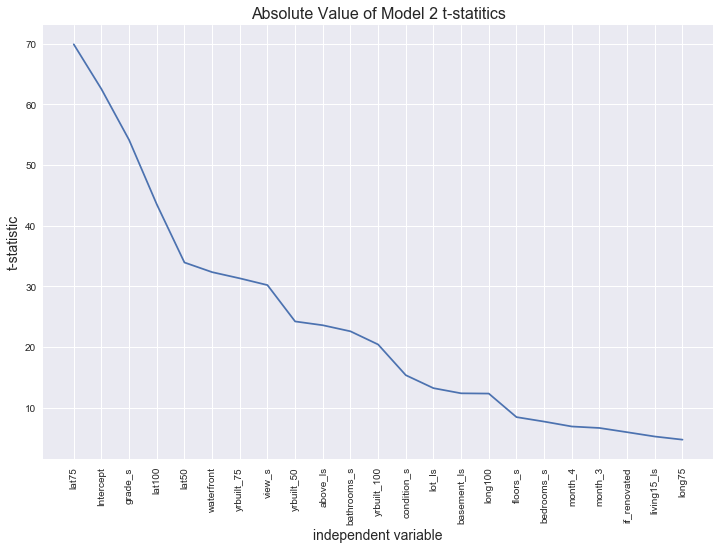

In [71]:
# plot t-statistics
t_stats = model_2.tvalues.abs().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
plt.plot(range(len(t_stats.keys())), t_stats.values)
plt.title('Absolute Value of Model 2 t-statitics', fontsize=16)
plt.xlabel('independent variable', fontsize=14)
plt.ylabel('t-statistic', fontsize=14)
plt.xticks(range(len(t_stats.keys())), t_stats.keys(), rotation='vertical');

The factors with the top 5 t-statistics follow a trend line in the plot above. For these items, the t-statistic value drops greatly between sorted rank positions. After these items, the slope of the t-statistic line is much smaller, and begins to stagger. The next great decrease happens between the 8th and 9th items. At this point the t-statistics are roughly a third of the first item. Let's limit our model to these top 8 variables (including the intercept) in order that any application of its results is manageable.

In [72]:
# columns with accepted t-stats and response variable
cols_keep = list(t_stats[t_stats > 28].keys())
cols_keep.append('price')

# third model with low t-stat features removed
df_m3 = df_m2.filter(cols_keep)
features = "+".join(col for col in df_m3.columns if col != 'price')
formula = 'price ~' + features
model_3 = ols(formula=formula, data=df_m3).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     4758.
Date:                Thu, 02 Jan 2020   Prob (F-statistic):               0.00
Time:                        23:33:22   Log-Likelihood:            -2.7905e+05
No. Observations:               20307   AIC:                         5.581e+05
Df Residuals:                   20299   BIC:                         5.582e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.443e+05   6970.666    -63.739      0.000   -4.58e+05   -4.31e+05
lat75       3.161e+05   4637.558     68.169      0.000    3.07e+05    3.25e+05
grade_s      1.75e+06   1.46e+04    119.905      0.000    1.72e+06    1.78e+06
lat100      1.779e+05   4496.476     39.558      0.000    1.69e+05    1.87e+05
lat50        1.36e+05   4535.003     29.997      0.000    1.27e+05    1.45e+05
waterfront  5.763e+05   1.96e+04     29.361      0.000    5.38e+05    6.15e+05
yrbuilt_75 -5.954e+04   3805.710    -15.644      0.000    -6.7e+04   -5.21e+04
view_s       3.68e+05   9119.862     40.348      0.000     3.5e+05    3.86e+05
==============================================================================
Omnibus:                    20667.181   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4017198.318
Skew:                           4.616   Prob(JB):                         0.00
Kurtosis:                      71.283   Cond. No.                         15.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We've reduced the model from 22 variables to 7 (plus an intercept). We're working with 21% of the 33 variables we started the modeling process with but explaining 62.3% of the total variation. This is close to the 70% explained previously. The model is now greatly simplified, decreasing the chance of overfitting. 

During our exploratory data analysis phase we saw that the dependent variable had a large range. Let's log transform **price** to see if any improvement to the model can be made.

### 3.5 Model with price transformation

In [73]:
# fourth model with log price as response variable
df_m4 = df_m3.copy()
df_m4['log_price'] = np.log(df_m4.price)
features = "+".join(col for col in df_m4.columns if col != 'price' and col != 'log_price')
formula = 'log_price ~' + features
model_4 = ols(formula=formula, data=df_m4).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     7385.
Date:                Thu, 02 Jan 2020   Prob (F-statistic):               0.00
Time:                        23:33:22   Log-Likelihood:                -2920.3
No. Observations:               20307   AIC:                             5857.
Df Residuals:                   20299   BIC:                             5920.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.4608      0.009   1322.453      0.000      11.444      11.478
lat75          0.6249      0.006    108.381      0.000       0.614       0.636
grade_s        2.6419      0.018    145.584      0.000       2.606       2.677
lat100         0.4367      0.006     78.122      0.000       0.426       0.448
lat50          0.3021      0.006     53.586      0.000       0.291       0.313
waterfront     0.3669      0.024     15.036      0.000       0.319       0.415
yrbuilt_75    -0.0532      0.005    -11.246      0.000      -0.062      -0.044
view_s         0.4355      0.011     38.407      0.000       0.413       0.458
==============================================================================
Omnibus:                      302.807   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              570.164
Skew:                           0.052   Prob(JB):                    1.55e-124
Kurtosis:                       3.814   Cond. No.                         15.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The model with **log_price** sees an R-squared increase of nearly 10%, from 0.623 to 0.719. The F-statistic also goes up, indicating a superior linear model. Additionally, distribution metrics see major improvement:

- Skewness measures the symmetry of the data about the mean. Normally-distributed errors should be symmetrically distributed about the mean. The normal distribution has 0 skew. The **log_price** model has a skew of 0.053 compared to 4.622 for the **price** model. This model is nearly normal and has lost the right tail present in the previous one.
- Kurtosis measures the shape of the distribution. It compares the amount of data close to the mean with data in the tails. The normal distribution has kurtosis of 3. The greater the kurtosis value, the more the distribution curve peaks. The **log_price** has a kurtosis of 3.818, nearly normal. This contrasts with the non-normal 71.445 value of the **price** model.
- Omnibus D'Angostino's and Jarque-Bera are both statistical tests for the presence of skewness and kurtosis. They also move in the direction of normality for this model.

Overfitting was mentioned above. In order to inspect whether we are able to predict housing prices from data not yet seen, let's split our dataset into training and testing subsets. We'll build our model on the training subset and predict the housing prices for the test subset. In this way we'll assess the risk of overfitting to training data. 

### 3.6 Model with Train-Test Split 

In [74]:
# import necessary libraries
from sklearn.model_selection import train_test_split

# train-test split
X = df_m4.iloc[:, :7]
y = df_m4.iloc[:, 7:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train-test version of fourth model
df_m4_train = pd.concat([y_train, X_train], axis=1)
features = "+".join(col for col in df_m4.columns if col != 'price' and col != 'log_price')
formula = 'log_price ~' + features
model_4_train = ols(formula=formula, data=df_m4_train).fit()
model_4_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     5952.
Date:                Thu, 02 Jan 2020   Prob (F-statistic):               0.00
Time:                        23:33:28   Log-Likelihood:                -2308.4
No. Observations:               16245   AIC:                             4633.
Df Residuals:                   16237   BIC:                             4694.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.4514      0.010   1187.015      0.000      11.432      11.470
lat75          0.6234      0.006     96.405      0.000       0.611       0.636
grade_s        2.6619      0.020    131.865      0.000       2.622       2.701
lat100         0.4394      0.006     70.152      0.000       0.427       0.452
lat50          0.3014      0.006     47.882      0.000       0.289       0.314
waterfront     0.3528      0.027     12.831      0.000       0.299       0.407
yrbuilt_75    -0.0564      0.005    -10.732      0.000      -0.067      -0.046
view_s         0.4290      0.013     33.383      0.000       0.404       0.454
==============================================================================
Omnibus:                      248.811   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              477.718
Skew:                           0.040   Prob(JB):                    1.84e-104
Kurtosis:                       3.836   Cond. No.                         15.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The model built with 80% of data in a training set is nearly identical to the model built from the entire dataset. This is our final model, the multiple linear regression culminating from all of our work processing and exploring.
Let's assess our final model's performance. It is anticipated to be good, from the coefficients that are given.

In [75]:
# import necessary libraries
from sklearn import metrics

# train-test model performance
y_train_pred = model_4_train.predict(X_train)
y_test_pred = model_4_train.predict(X_test)

train_acc = metrics.r2_score(y_train['log_price'], y_train_pred)
test_acc = metrics.r2_score(y_test['log_price'], y_test_pred)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train['log_price'], y_train_pred))
test_rmse = np.sqrt(metrics.mean_squared_error(y_test['log_price'], y_test_pred))

print('Train Accuracy:', train_acc)
print('Test Accuracy:', test_acc)
print('Train RMSE:', train_rmse)
print('Test RMSE:', test_rmse)

Train Accuracy: 0.7195858198152298
Test Accuracy: 0.711523039499929
Train RMSE: 0.27891736838104636
Test RMSE: 0.2813984778502564


For our final model, training accuracy is 0.720 and testing accuracy is 0.712. The model is able to account for 70% of the variation in predicting housing prices on both data it was trained on and new data. The root mean square error for the training and testing sets are both about 0.28. The closeness of these values tells us that overfitting is not a problem. The final model performs well on unseen data. Now let's interpret our findings.


## 4. Interpretation
### 4.1 Conclusion

In [139]:
print('Final model parameter coefficients:')
model_4_train.params

Final model parameter coefficients:


Intercept     11.451404
lat75          0.623415
grade_s        2.661902
lat100         0.439410
lat50          0.301350
waterfront     0.352765
yrbuilt_75    -0.056449
view_s         0.428994
dtype: float64

Our final model contains 7 coefficients that have an impact on housing sales price. Of these, the **grade** based on the King County grading system has the greatest effect. The engineered feature **yrbuilt_75**, given a value of 1 for houses built after 1975 but before 1997 and compared against the reference category **yrbuilt_25**, has the least effect. The intercept accounts for the greatest portion of a predicted house price due to the fact that binary and scaled variables are used within the model. To give a sense of the real-world performance of this model, let's take a look at some examples that have been pulled from the test set.

### Final Model:

$ log\_price = 11.45 + 0.62 * lat75 + 2.66 * grade\_s + 0.44 * lat100 + 0.30 * lat50 + 0.35 * waterfront
    - 0.06 * yrbuilt\_75 + 0.43 * view\_s $
    
###### Definitions of final model features in raw dataset terms:     
- **log_price** = log(*price*)
- **lat75** = 1 for *lat* > 47.571900 and *lat* <= 47.678100, 0 otherwise
- **grade_s** = (*grade*(i) - min(*grade*)) / (max(*grade*) - min(*grade*)) where min(*grade*) = 3 and max(*grade*) = 13
- **lat100** = 1 for *lat* >= 47.678100, 0 otherwise
- **lat50** = 1 for *lat* > 47.471200 and *lat* <= 47.571900, 0 otherwise
- **waterfront** = 1 for houses with *waterfront* view, 0 otherwise
- **yrbuilt_75** = 1 for *yr_built* > 1975 and *yr_built* <= 1997, 0 otherwise
- **view_s** = (*view*(i) - min(*view*)) / (max(*view*) - min(*view*)) where min(*view*) = 0 and max(*view*) = 4

### Predictions: 

### Good Example:

###### Result from dataset: 
from *y_test* with index = 2930:
- **log_price** = 12.250090
- **price** = 209000

###### Result from final model:
from *X_test* with index = 2930:
- **lat75** = 0
    - **lat** = 47.3644
- **grade_s** = 0.3
    - **grade** = 6
- **lat100** = 0
- **lat50** = 0
- **waterfront** = 0
- **yrbuilt_75** = 0
    - **yr_built** = 1969
- **view_s** = 0.0
    - **view** = 0

###### Calculation:
$ log(price) = 11.45 + 0.62 * 0 + 2.66 * 0.3 + 0.44 * 0 + 0.30 * 0 + 0.35 * 0
    - 0.06 * 0 + 0.42 * 0 $
    
$ log(price) = 11.45 + 2.66 * 0.4 $

$ log(price) = 12.25 $

$ price = 208976.06 $

###### Check:
from *y_test_pred* with index = 2930:
- **log_price** = 12.249975

###### Difference: 
$ price\_delta = 208976.06 - 209000 = -23.94 $



### Bad Example:

###### Result from dataset: 
from *y_test* with index = 8098:
- **log_price** = 12.560244
- **price** = 285000

###### Result from final model:
from *X_test* with index = 8098:
- **lat75** = 1
    - **lat** = 47.5919
- **grade_s** = 0.4
    - **grade** = 7
- **lat100** = 0
- **lat50** = 0
- **waterfront** = 0
- **yrbuilt_75** = 0
    - **yr_built** = 1998
- **view_s** = 0.0
    - **view** = 0

###### Calculation:
$ log(price) = 11.45 + 0.62 * 1 + 2.66 * 0.4 + 0.44 * 0 + 0.30 * 0 + 0.35 * 0
    - 0.06 * 0 + 0.42 * 0 $
    
$ log(price) = 11.45 + 0.62 * 1 + 2.66 * 0.4 $

$ log(price) = 13.140 $

$ price = 508908.24 $

###### Check:
from *y_test_pred* with index = 8098:
- **log_price** = 13.140023

###### Difference: 
$ price\_delta = 508908.24 - 285000 = 223908.24 $

From the sample predictions above, we see that the model can get as close as `$23` to a house's sales price. It is predictions like this one that would benefit our stakeholders and add confidence to using this model in production. On the other hand, the second example above shows us that the model can be off of a house sales price by `$223,908`. That is a significant amount. As a result of the volatiliy in predictions, I would recommend looking at different aspects of the modeling process more closely to see if performance can be improved. For example, leverage of certain points on the produced model could be evaluation. Also, the assumption of homoscedasticity ought to be taken into account. Addtionally, there are many decisions in the scrubbing and data exploration phases that could be looked at with new perspective. 

To conclude, the skills of module 1 have successfully been put to the test and a multiple linear regression model has been built to analyze King County housing dataset sales prices and generate predictions. 

### 4.2  Appendix

Additional aspects of our model that could be investigated if this problem were revisited. These items are outside the scope of this project.

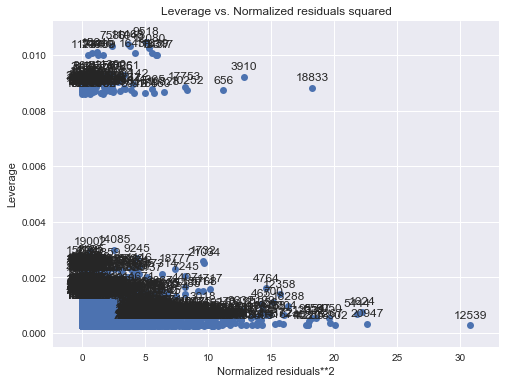

In [140]:
# Influence tests

# leverage is a measure of how far away the independent variable values of an observation are from those of the other 
# observations. High-leverage points are those observations made at extreme or outlying values of the independent 
# variables such that the lack of neighboring observations means that the fitted regression model will pass close to 
# that particular observation.

# import necessary libraries
from statsmodels.graphics.regressionplots import plot_leverage_resid2

# leverage plot
fig, ax = plt.subplots(figsize=(8, 6))
fig = plot_leverage_resid2(model_4_train, ax=ax) 

In [548]:
# Heteroscedasticity tests

# Breush-Pagan test
# It tests whether the variance of the errors from a regression is dependent on the values of the independent variables. 
# In that case, heteroskedasticity is present. If the test statistic has a p-value below an appropriate threshold 
# (e.g. p < 0.05) then the null hypothesis of homoskedasticity is rejected and heteroskedasticity is assumed.
name = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
test = sms.het_breuschpagan(model_4_train.resid, model_4_train.model.exog)
display(lzip(name, test)) 

# Goldfeld-Quandt test
# Tests whether variance is the same in 2 subsamples
# The Null hypothesis is that the variance in the two sub-samples are the same. The alternative hypothesis, can be 
# increasing, i.e. the variance in the second sample is larger than in the first, or decreasing or two-sided.
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(model_4_train.resid, model_4_train.model.exog)
lzip(name, test) 

[('Lagrange multiplier statistic', 264.8436926059567),
 ('p-value', 1.911876694741031e-53),
 ('f-value', 38.44291949271387),
 ('f p-value', 6.849018868114643e-54)]

[('F statistic', 0.9955274886702508), ('p-value', 0.5799979081557749)]